In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emg-dataset/EMG_data_for_gestures-master/README.txt
/kaggle/input/emg-dataset/EMG_data_for_gestures-master/17/2_raw_data_11-20_23.03.16.txt
/kaggle/input/emg-dataset/EMG_data_for_gestures-master/17/1_raw_data_11-19_23.03.16.txt
/kaggle/input/emg-dataset/EMG_data_for_gestures-master/19/2_raw_data_12-11_26.04.16.txt
/kaggle/input/emg-dataset/EMG_data_for_gestures-master/19/1_raw_data_12-10_26.04.16.txt
/kaggle/input/emg-dataset/EMG_data_for_gestures-master/22/2_raw_data_12-39_28.03.16.txt
/kaggle/input/emg-dataset/EMG_data_for_gestures-master/22/1_raw_data_12-37_28.03.16.txt
/kaggle/input/emg-dataset/EMG_data_for_gestures-master/35/1_raw_data_10-03_13.04.16.txt
/kaggle/input/emg-dataset/EMG_data_for_gestures-master/35/2_raw_data_10-05_13.04.16.txt
/kaggle/input/emg-dataset/EMG_data_for_gestures-master/23/1_raw_data_13-18_05.04.16.txt
/kaggle/input/emg-dataset/EMG_data_for_gestures-master/23/2_raw_data_13-19_05.04.16.txt
/kaggle/input/emg-dataset/EMG_data_for_gestures-master

In [2]:
import os
import pandas as pd

# Path to the root directory containing the 36 folders
root_dir = '/kaggle/input/emg-dataset/EMG_data_for_gestures-master'

# Initialize an empty DataFrame
combined_data = pd.DataFrame()

# Iterate through each folder
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            # Load the file and append it to the combined DataFrame
            temp_data = pd.read_csv(file_path, delimiter='\t')  # Assuming tab-delimited files
            temp_data['Subject'] = folder  # Add a column for subject identification
            combined_data = pd.concat([combined_data, temp_data], ignore_index=True)

# Save the combined dataset for further processing
combined_data.to_csv('combined_emg_data.csv', index=False)
print("Data combined and saved!")


Data combined and saved!


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load a sample file
file_path = "/kaggle/working/combined_emg_data.csv"  # Replace with the actual file path
data = pd.read_csv(file_path, delimiter=",")  # Assuming tab-separated values

# Display the first few rows of the dataset
data.head()


,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,Subject
0,1,-0.00001,-0.00002,-0.00001,-0.00001,-0.00003,-0.00003,0.0,-0.00001,0.0,17
1,5,-0.00001,-0.00002,-0.00001,-0.00001,-0.00003,-0.00003,0.0,-0.00001,0.0,17
2,6,-0.00001,-0.00002,-0.00001,-0.00001,-0.00003,-0.00003,0.0,-0.00001,0.0,17
3,7,-0.00001,-0.00002,-0.00001,-0.00001,-0.00003,-0.00003,0.0,-0.00001,0.0,17
4,8,-0.00001,-0.00002,-0.00001,-0.00001,-0.00003,-0.00003,0.0,-0.00001,0.0,17


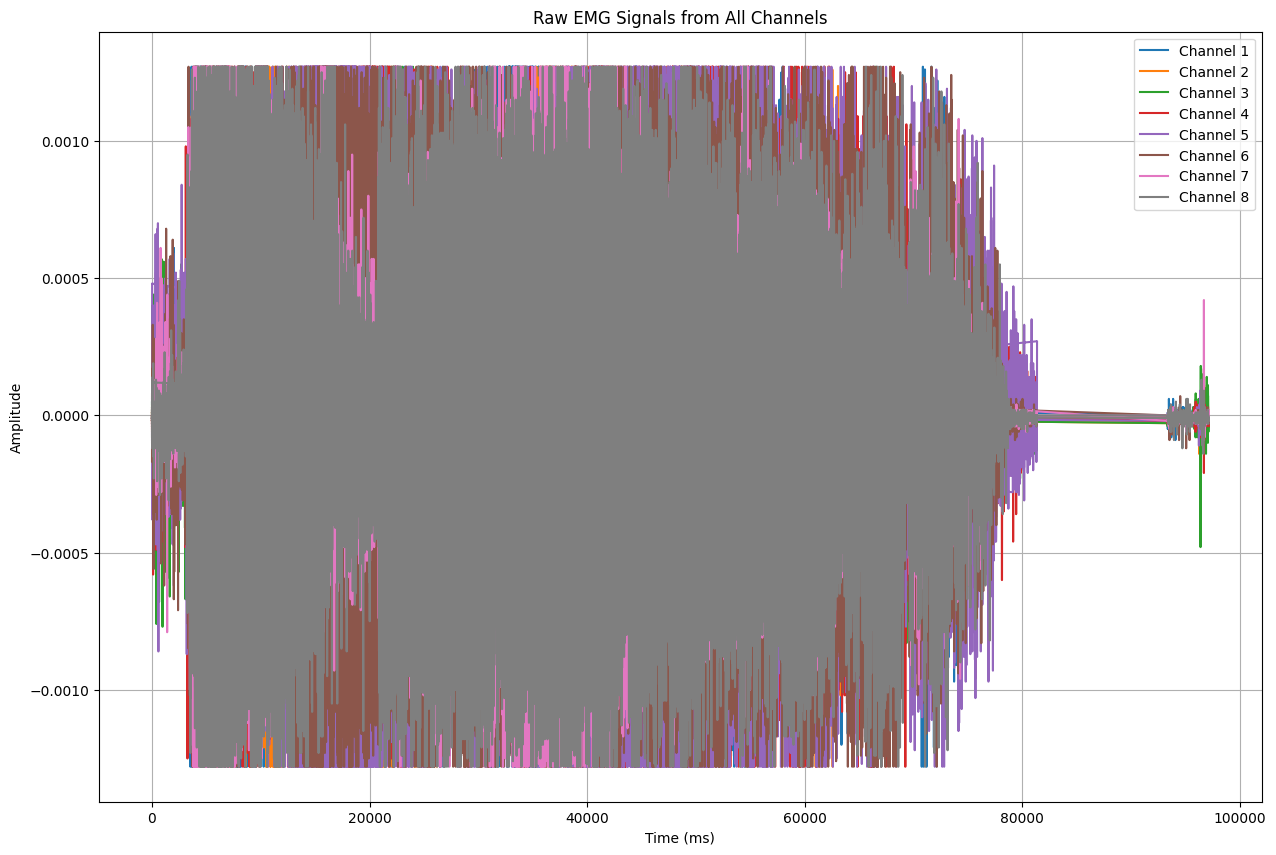

In [6]:
# Plot all EMG channels
plt.figure(figsize=(15, 10))

for channel in range(1, 9):
    plt.plot(data['time'], data[f'channel{channel}'], label=f'Channel {channel}')

plt.title('Raw EMG Signals from All Channels')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


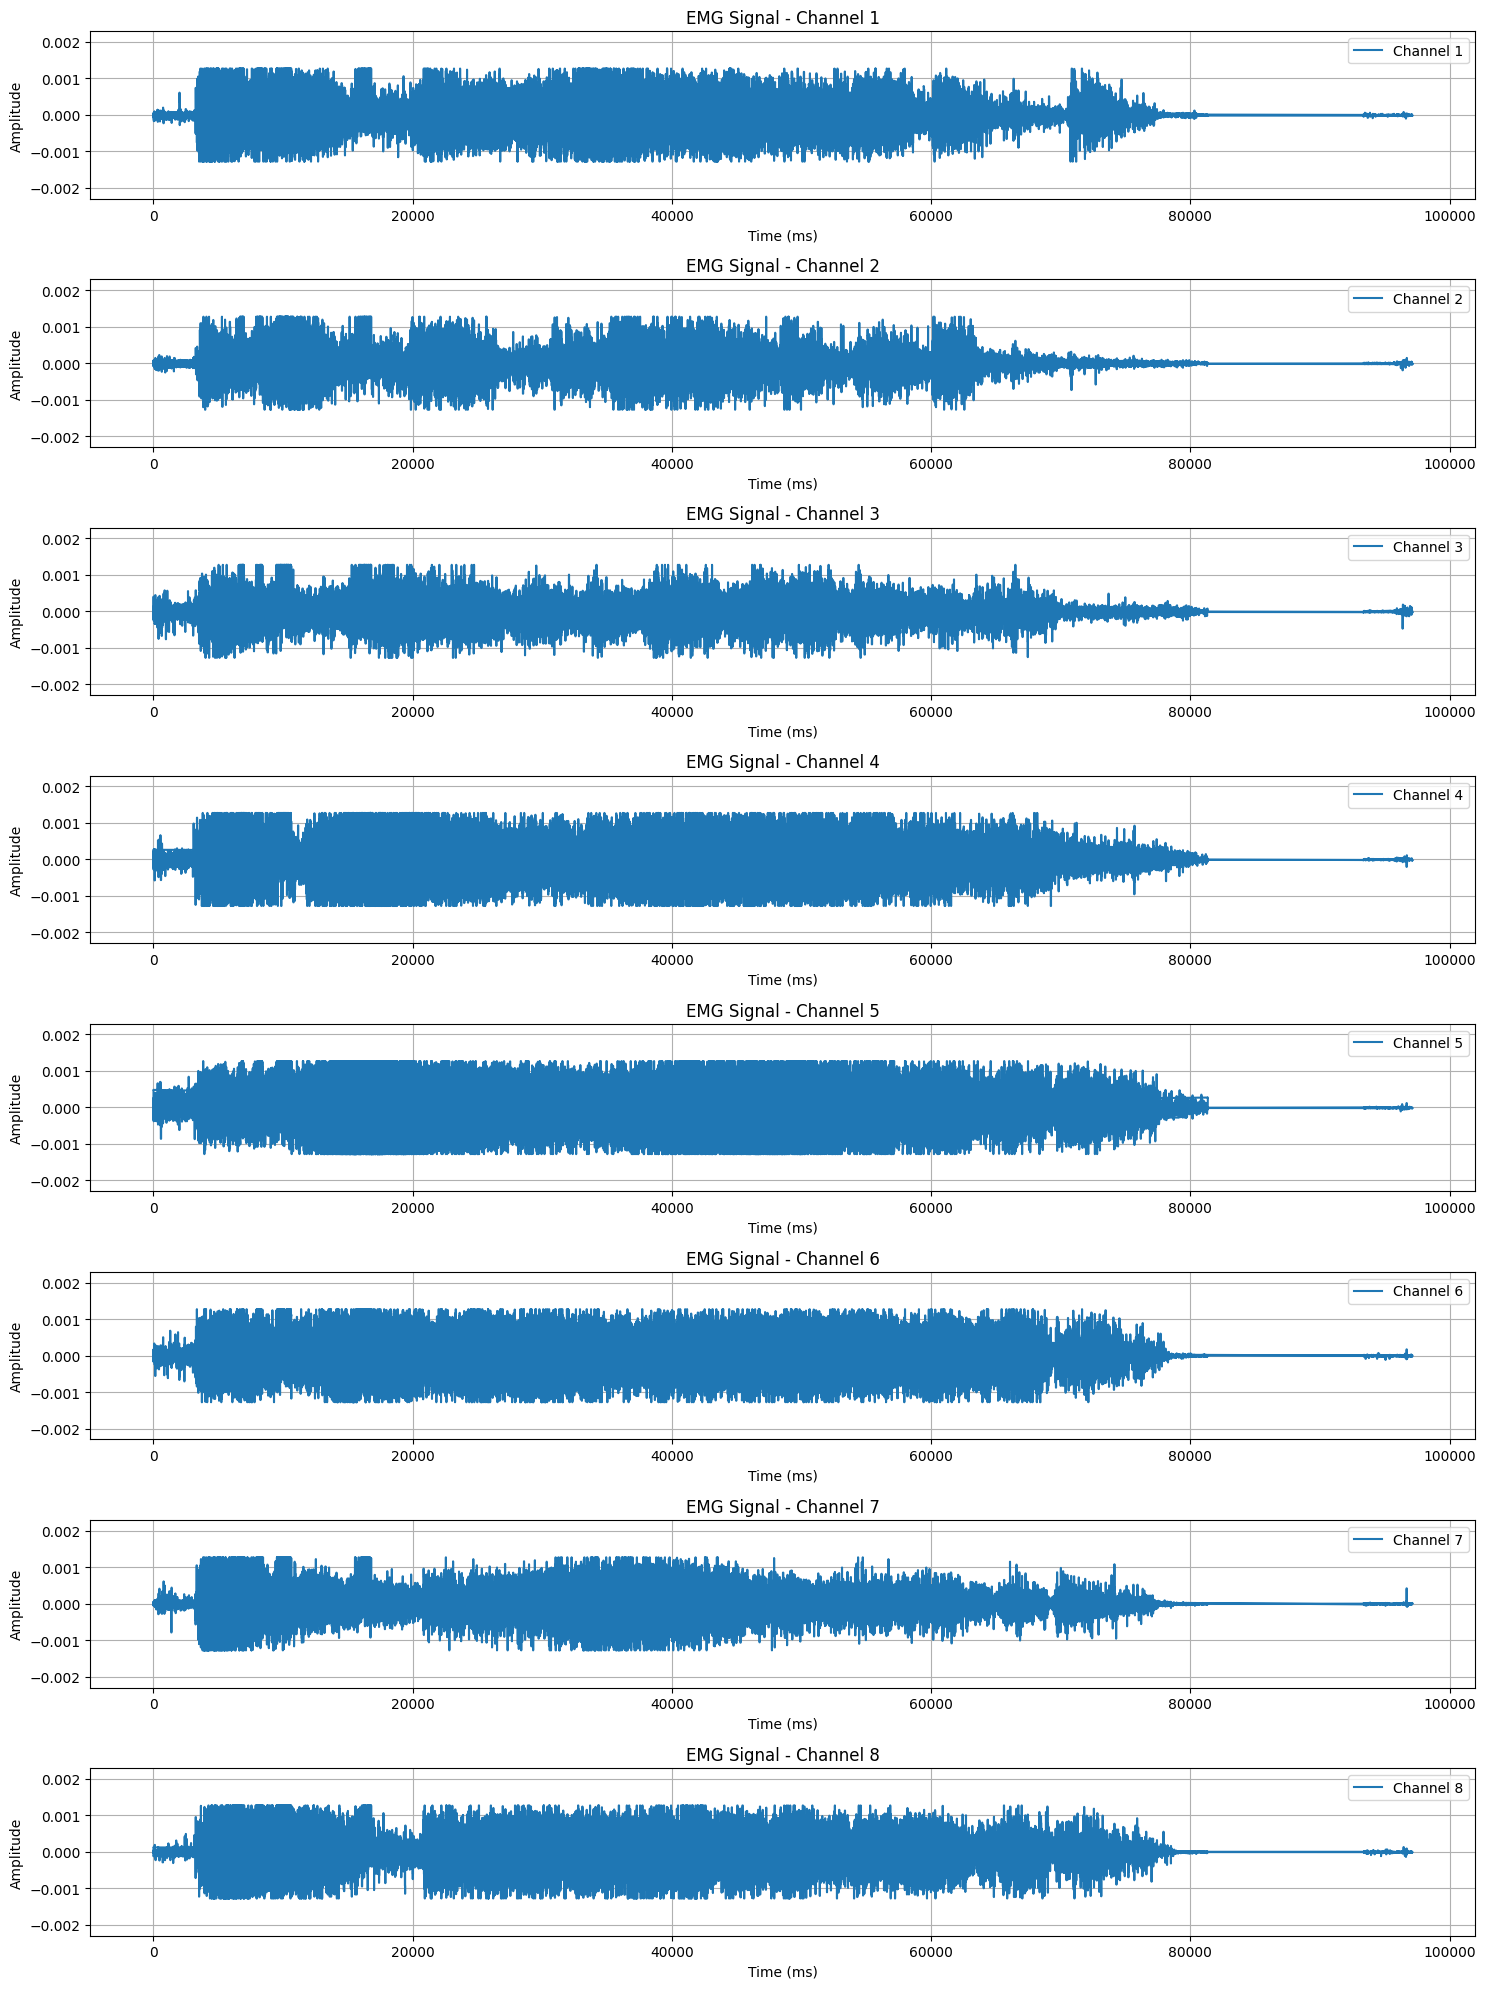

In [14]:
import matplotlib.pyplot as plt

# Plot each channel in separate subplots
plt.figure(figsize=(15, 20))  # Adjust figure size for clarity

for channel in range(1, 9):
    plt.subplot(8, 1, channel)
    
    # Get the min and max values for the current channel
    min_val = data[f'channel{channel}'].min()
    max_val = data[f'channel{channel}'].max()
    
    # Plot the signal
    plt.plot(data['time'], data[f'channel{channel}'], label=f'Channel {channel}')
    
    # Adjust y-axis limits with some padding
    padding = 0.4 * (max_val - min_val)  # 10% of the signal range
    plt.ylim(min_val - padding, max_val + padding)
    
    # Add titles and labels
    plt.title(f'EMG Signal - Channel {channel}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


# Plot Each Channel in Separate Subplots

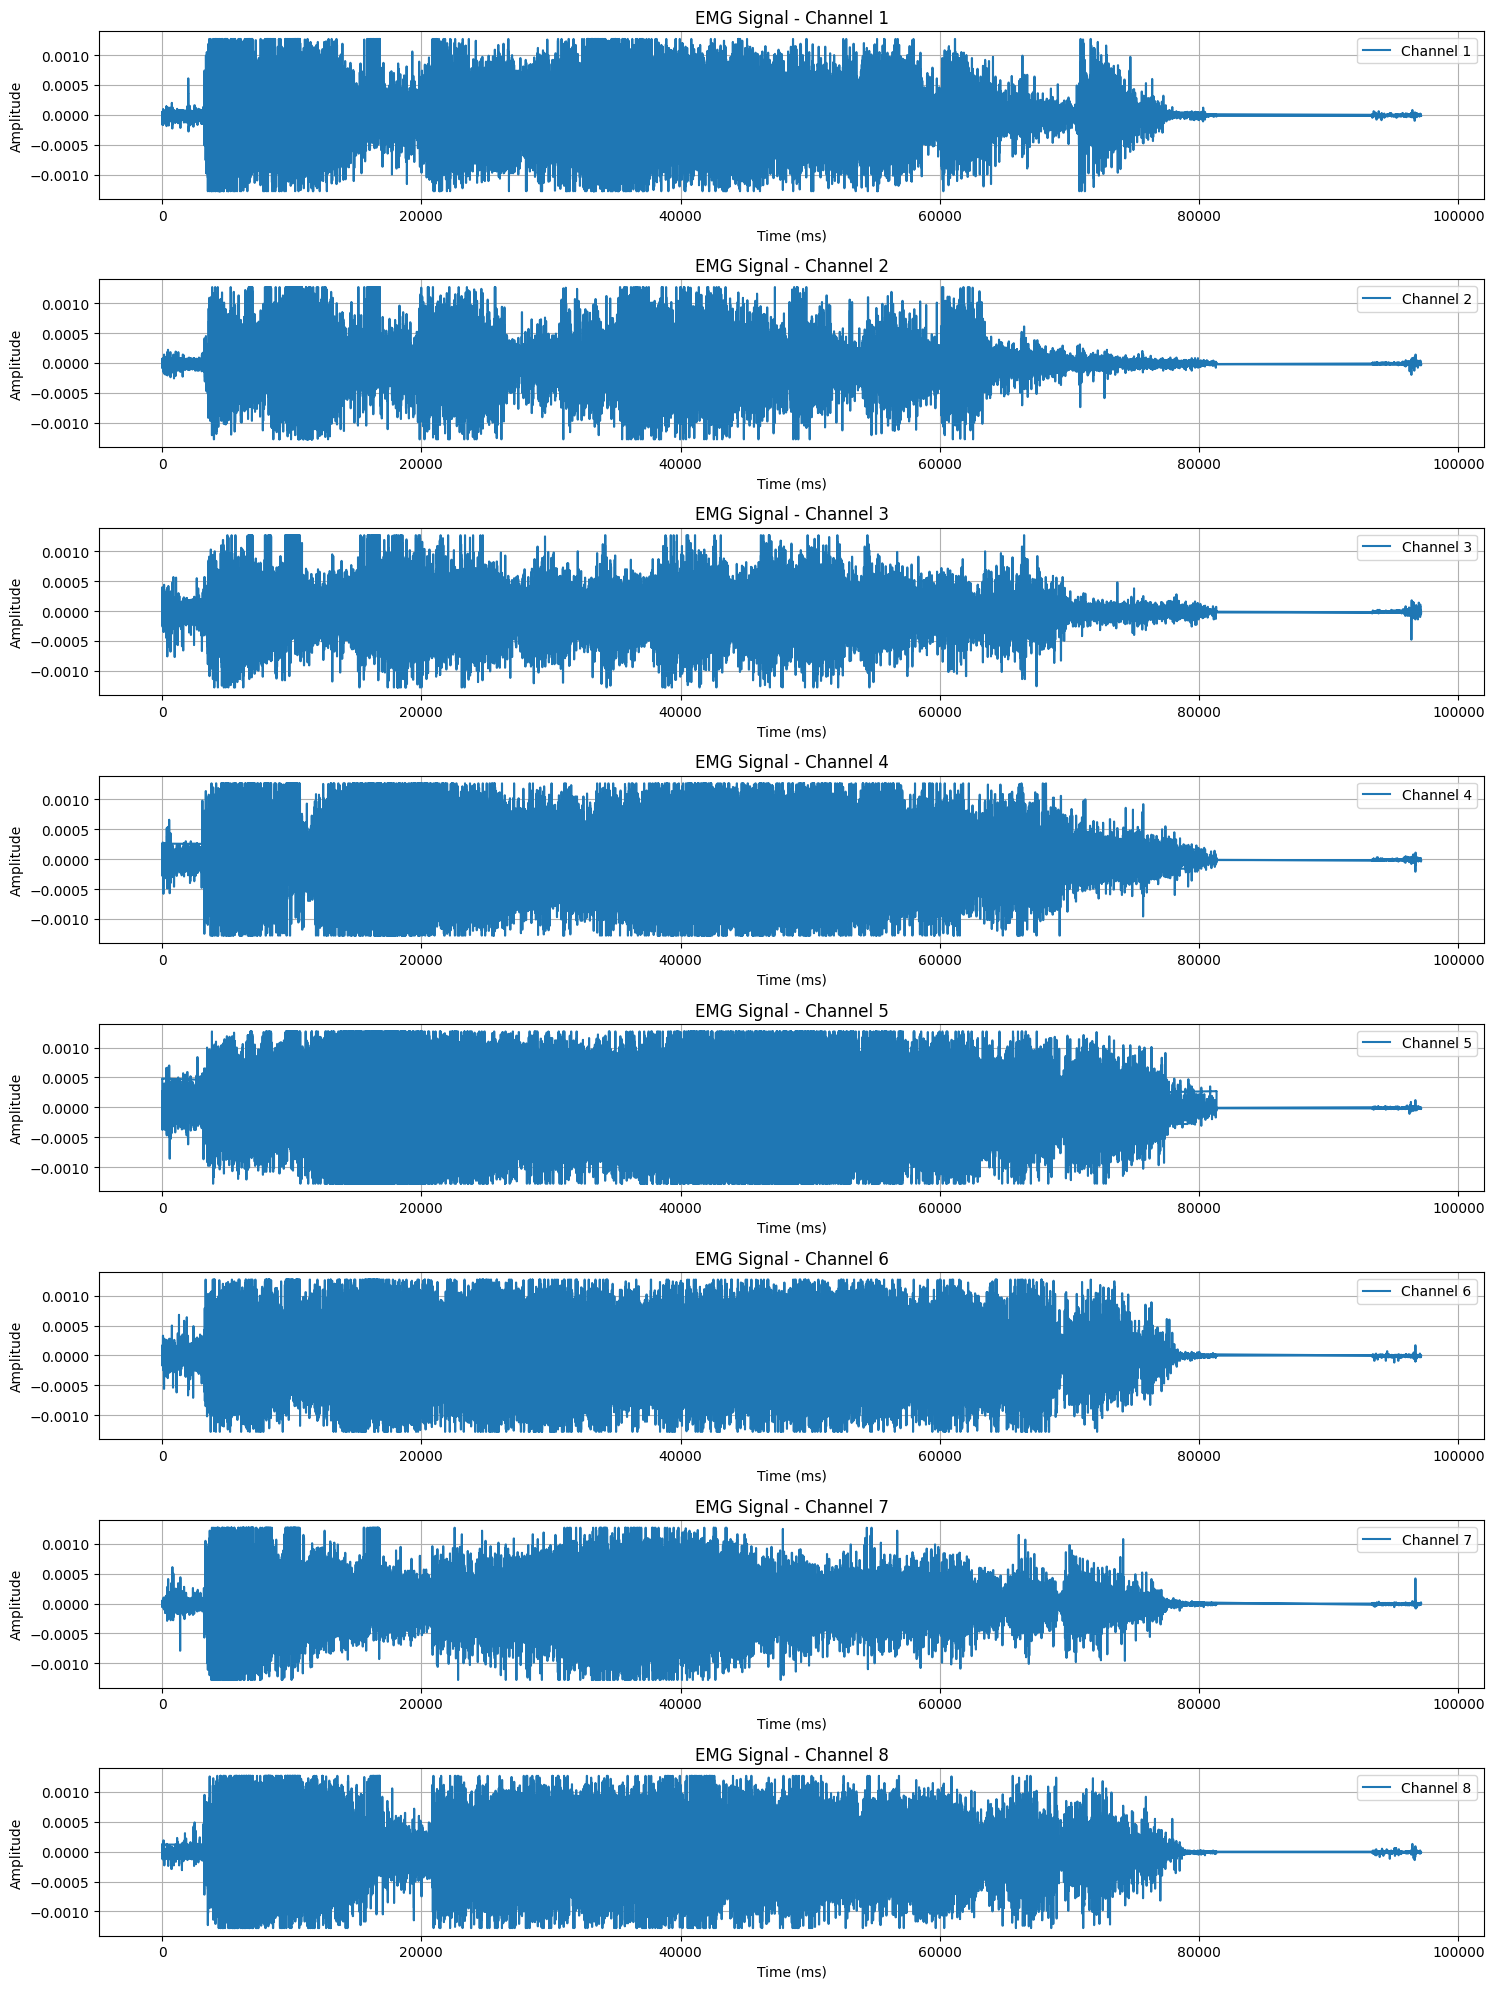

In [9]:
import matplotlib.pyplot as plt

# Plot each channel in separate subplots
plt.figure(figsize=(15, 20))  # Adjust figure size for clarity

for channel in range(1, 9):
    plt.subplot(8, 1, channel)
    plt.plot(data['time'], data[f'channel{channel}'], label=f'Channel {channel}')
    plt.title(f'EMG Signal - Channel {channel}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


# Class wise visualization

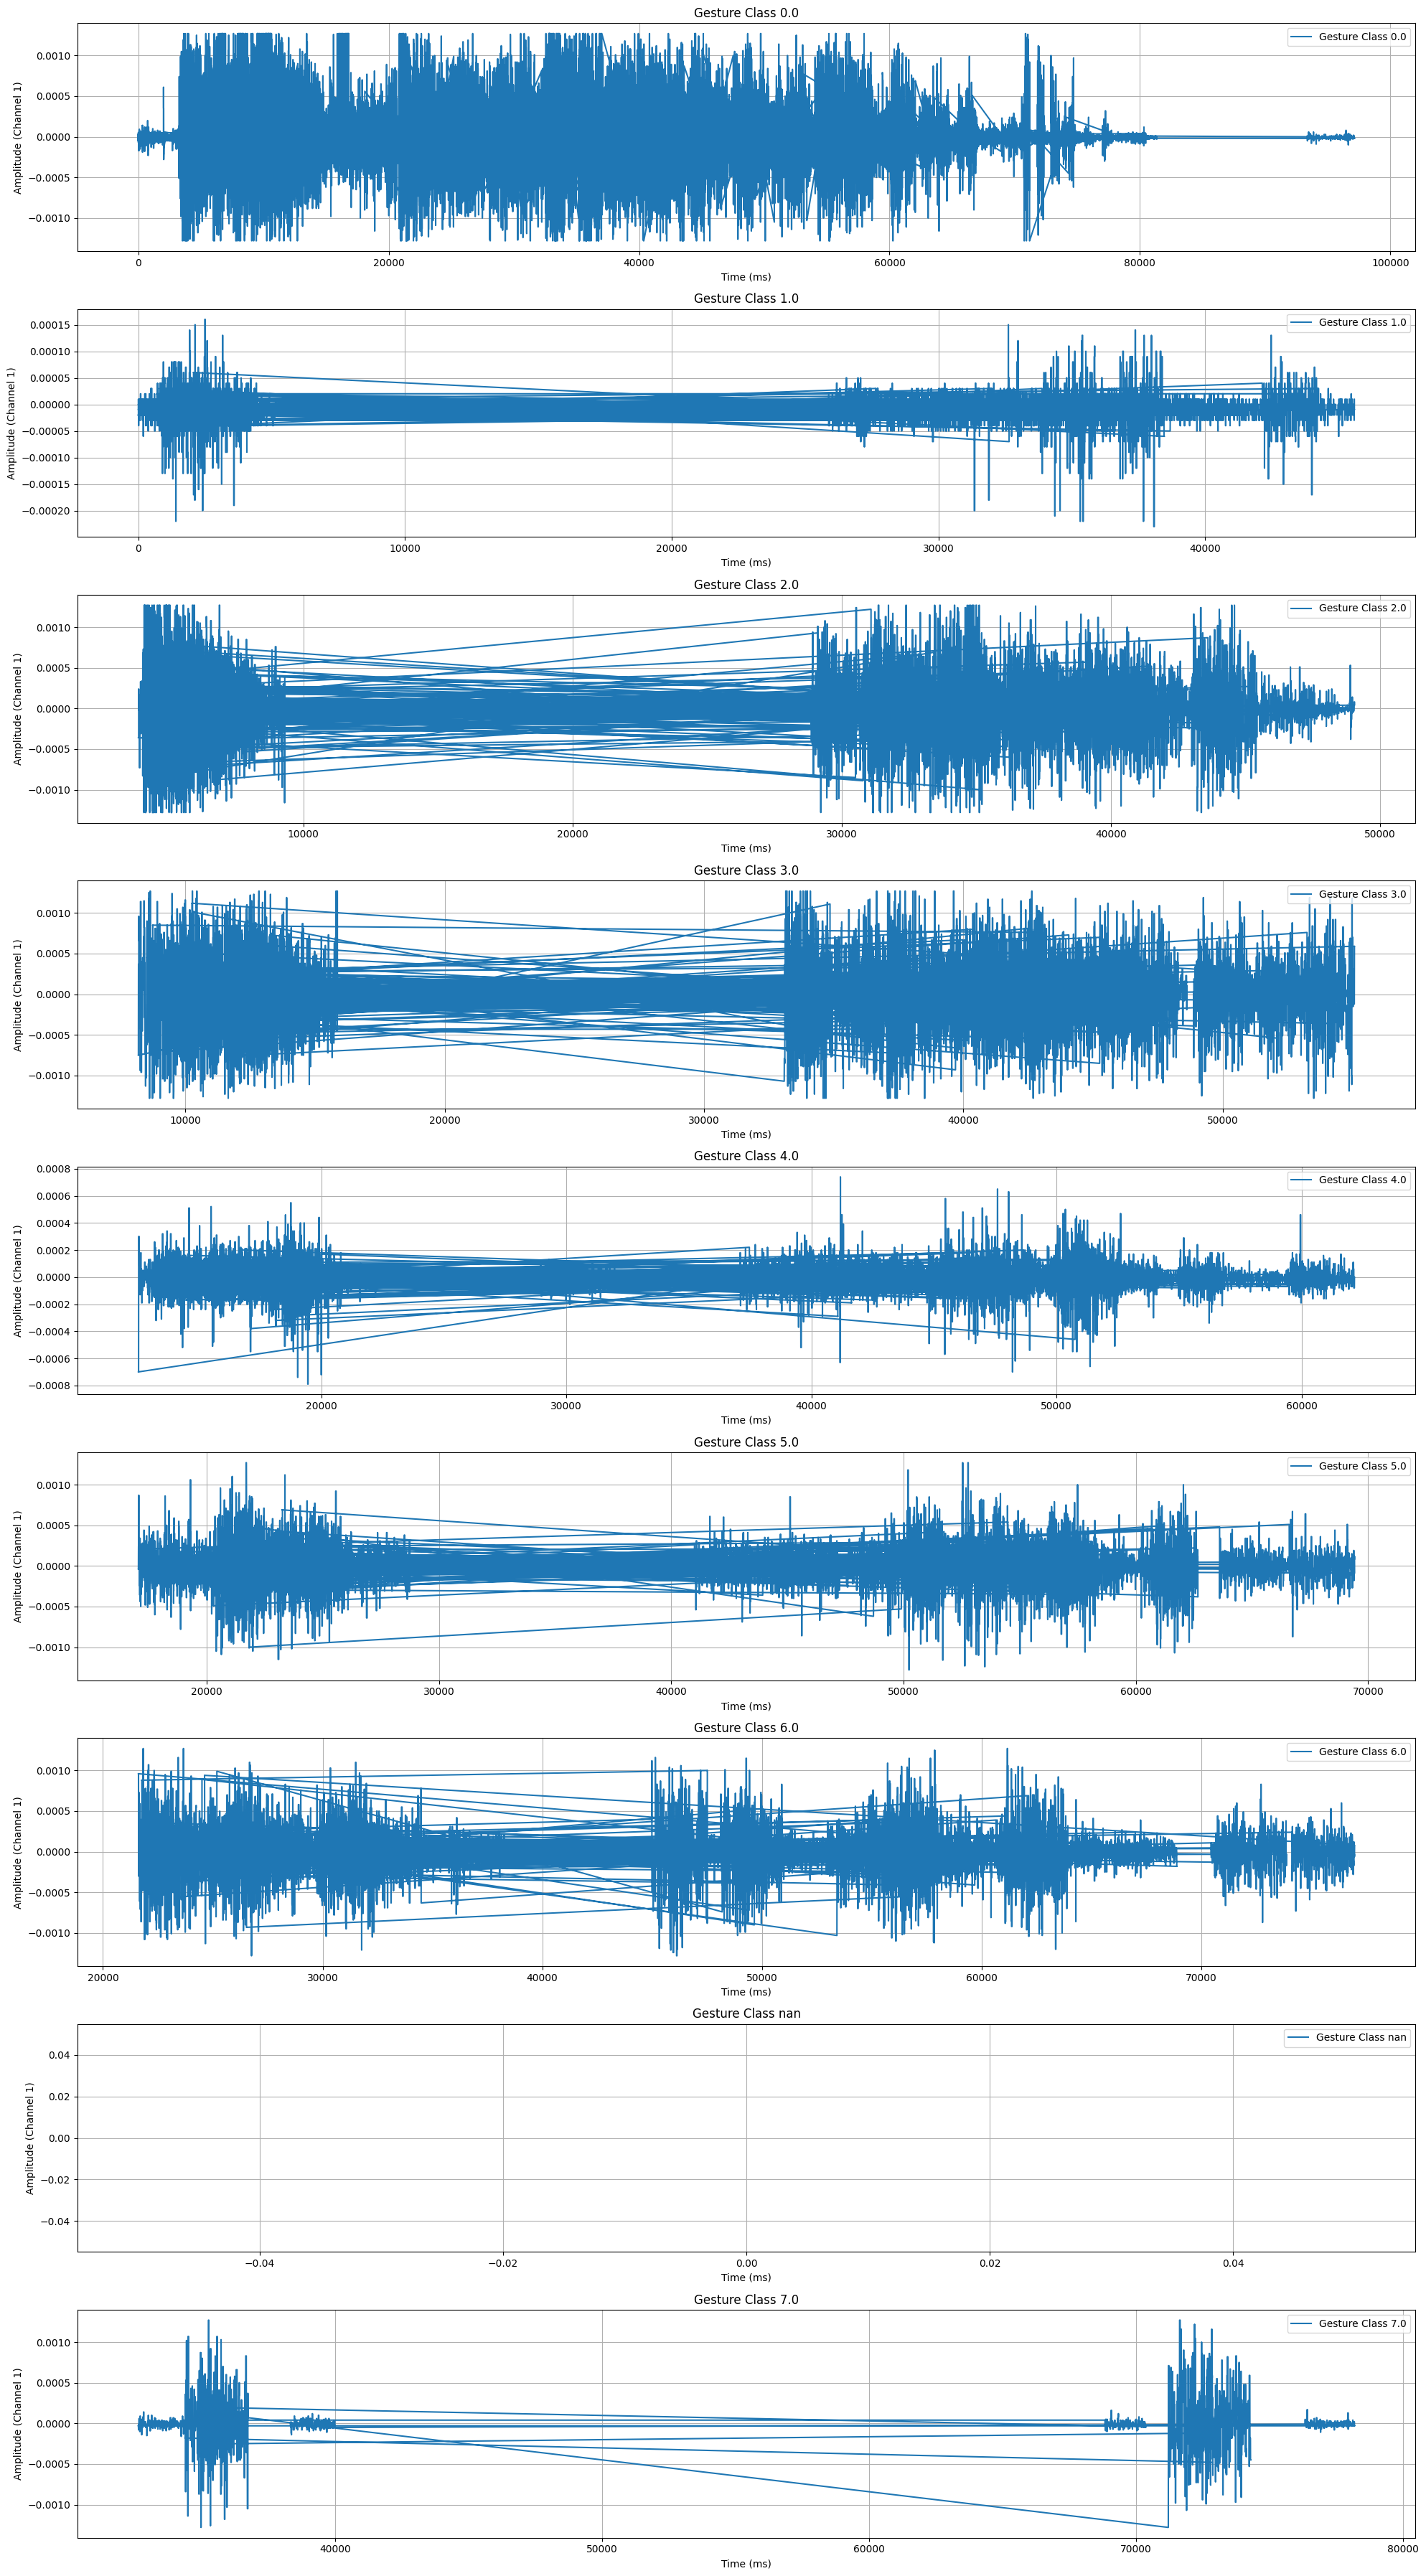

In [10]:
# Unique classes
classes = data['class'].unique()

plt.figure(figsize=(20, len(classes) * 4))  # Dynamic height based on the number of classes

for i, cls in enumerate(classes):
    class_data = data[data['class'] == cls]  # Filter data by class
    plt.subplot(len(classes), 1, i + 1)
    plt.plot(class_data['time'], class_data['channel1'], label=f'Gesture Class {cls}')
    plt.title(f'Gesture Class {cls}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (Channel 1)')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()


# Gesture distribution 

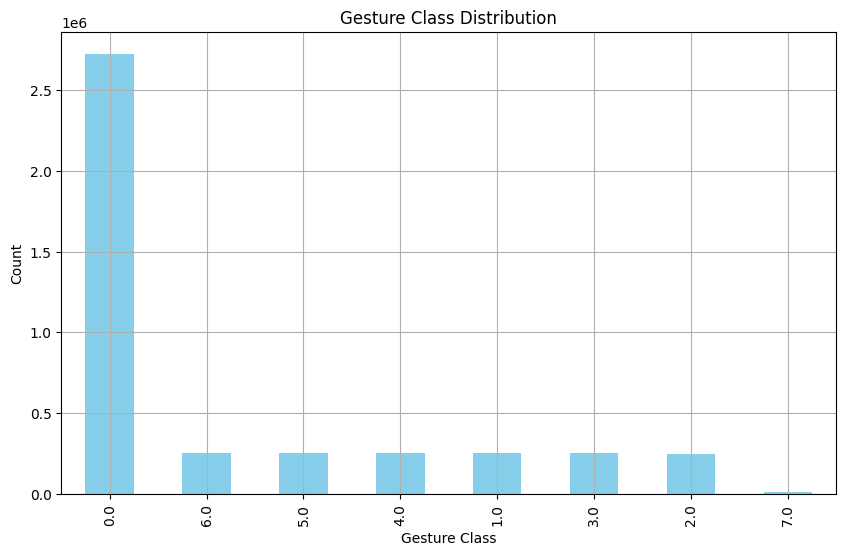

In [11]:
# Count occurrences of each gesture class
gesture_counts = data['class'].value_counts()

# Plot distribution
plt.figure(figsize=(10, 6))
gesture_counts.plot(kind='bar', color='skyblue')
plt.title('Gesture Class Distribution')
plt.xlabel('Gesture Class')
plt.ylabel('Count')
plt.grid()
plt.show()


# Signal Dynamics for a Specific Gesture

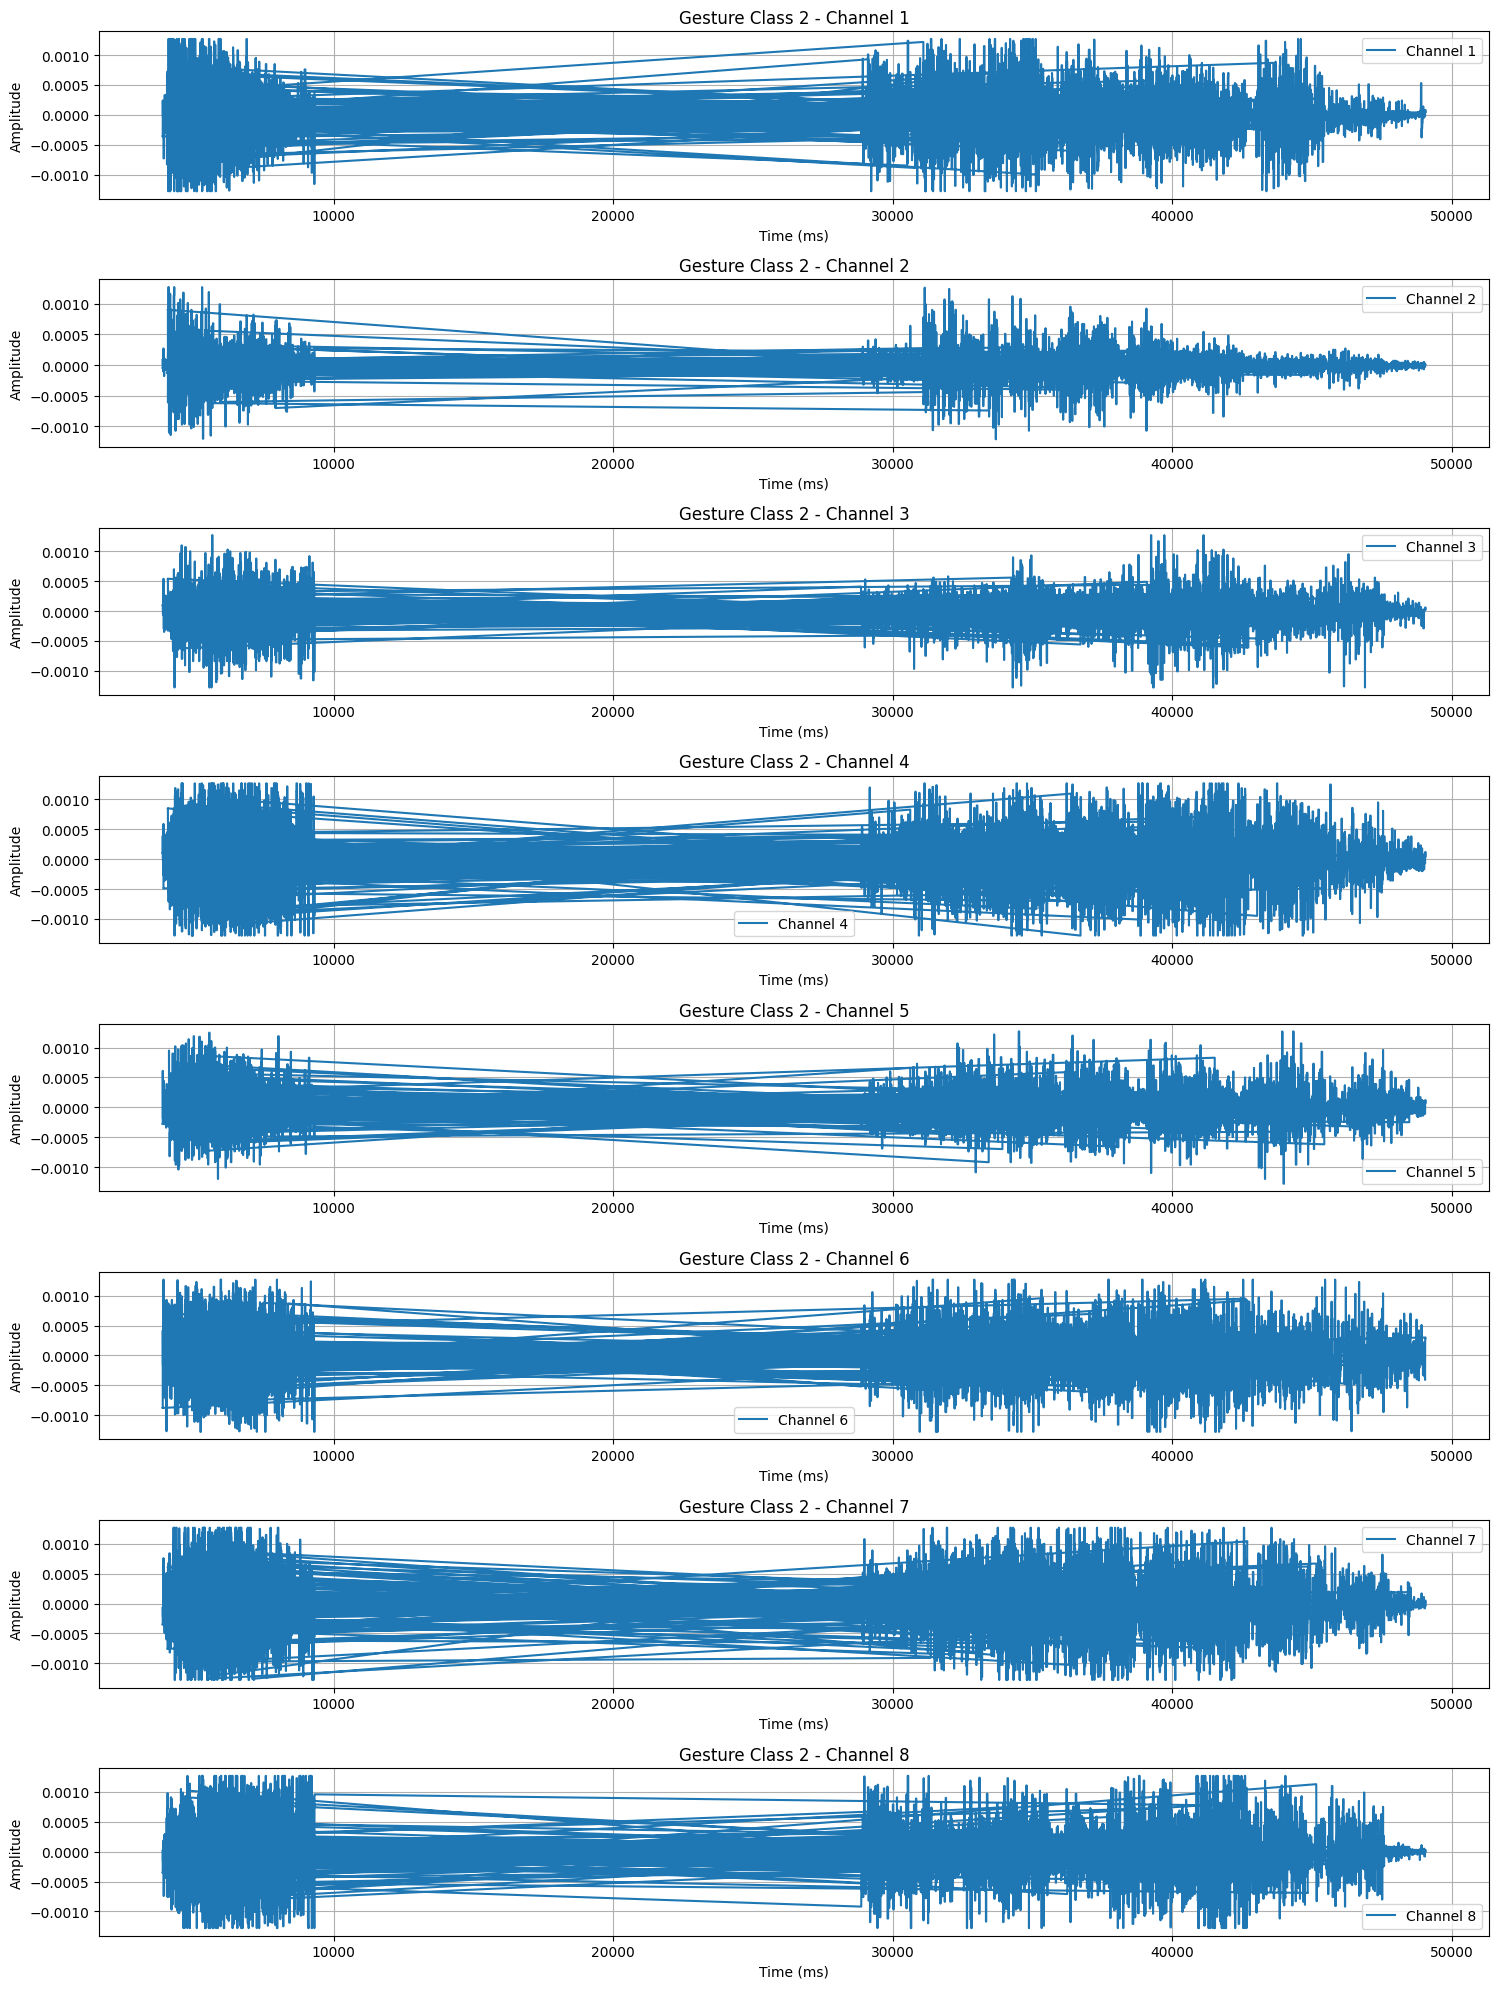

In [12]:
gesture_class = 2  # Replace with the desired class label
gesture_data = data[data['class'] == gesture_class]

plt.figure(figsize=(15, 20))

for channel in range(1, 9):
    plt.subplot(8, 1, channel)
    plt.plot(gesture_data['time'], gesture_data[f'channel{channel}'], label=f'Channel {channel}')
    plt.title(f'Gesture Class {gesture_class} - Channel {channel}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()


# Data Preprocessing

In [15]:
from scipy.signal import butter, filtfilt
import numpy as np

# Function to apply a bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Configuration for filtering
lowcut = 20  # Low cutoff frequency in Hz
highcut = 450  # High cutoff frequency in Hz
fs = 1000  # Sampling frequency in Hz

# Apply bandpass filtering to all EMG channels
for channel in range(1, 9):
    data[f'channel{channel}'] = bandpass_filter(data[f'channel{channel}'], lowcut, highcut, fs)

# Normalizing data (Z-score normalization)
for channel in range(1, 9):
    data[f'channel{channel}'] = (data[f'channel{channel}'] - np.mean(data[f'channel{channel}'])) / np.std(data[f'channel{channel}'])

# Save preprocessed data
data.to_csv('preprocessed_emg_data.csv', index=False)
print("Data preprocessing completed and saved.")


Data preprocessing completed and saved.


# Feature Extraction
Extract features from the preprocessed EMG signals to use in classification.

**Features**:
Root Mean Square (RMS)
Zero Crossings (ZC)
Waveform Length (WL)

In [16]:
# Function to extract features
def extract_features(segment):
    features = {}
    for channel in range(1, 9):
        signal = segment[f'channel{channel}']
        features[f'channel{channel}_rms'] = np.sqrt(np.mean(signal ** 2))
        features[f'channel{channel}_zc'] = ((signal[:-1] * signal[1:]) < 0).sum()  # Zero crossings
        features[f'channel{channel}_wl'] = np.sum(np.abs(np.diff(signal)))  # Waveform length
    return features

# Extract features for each gesture
window_size = fs * 3  # 3 seconds window
features_list = []
for gesture_class in data['class'].unique():
    gesture_data = data[data['class'] == gesture_class]
    for i in range(0, len(gesture_data), window_size):
        segment = gesture_data.iloc[i:i + window_size]
        if len(segment) == window_size:
            features = extract_features(segment)
            features['class'] = gesture_class
            features_list.append(features)

# Convert to DataFrame and save
features_df = pd.DataFrame(features_list)
features_df.to_csv('emg_features.csv', index=False)
print("Feature extraction completed and saved.")


Feature extraction completed and saved.


Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       181
         1.0       0.83      0.88      0.86        17
         2.0       0.85      0.69      0.76        16
         3.0       0.88      0.39      0.54        18
         4.0       0.89      0.89      0.89        18
         5.0       0.86      0.43      0.57        14
         6.0       0.73      0.61      0.67        18

    accuracy                           0.83       282
   macro avg       0.84      0.69      0.74       282
weighted avg       0.83      0.83      0.82       282



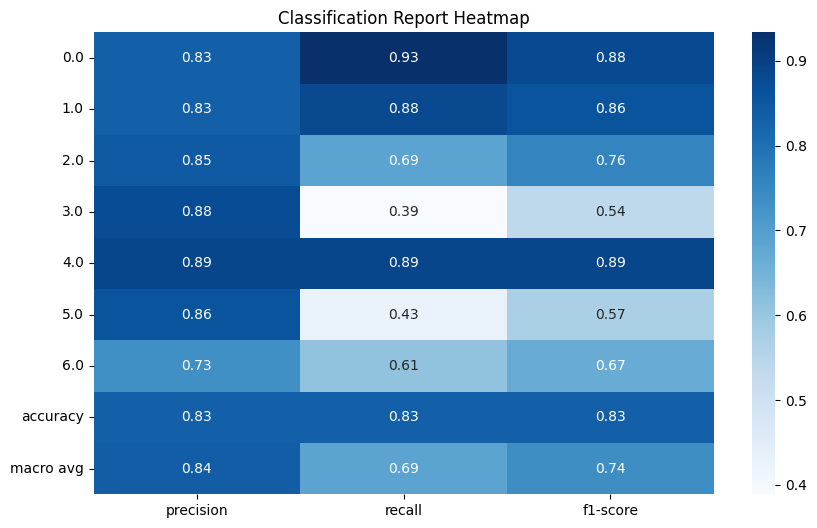

<Figure size 800x600 with 0 Axes>

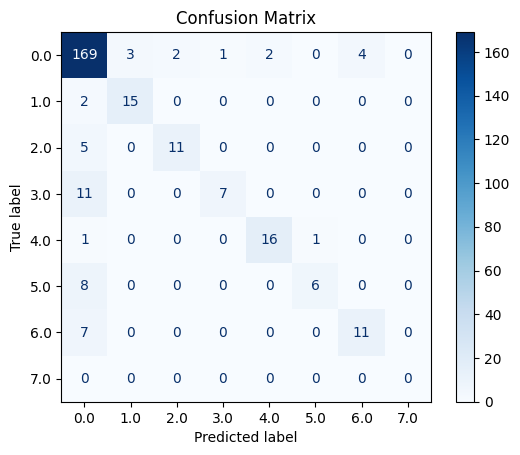

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


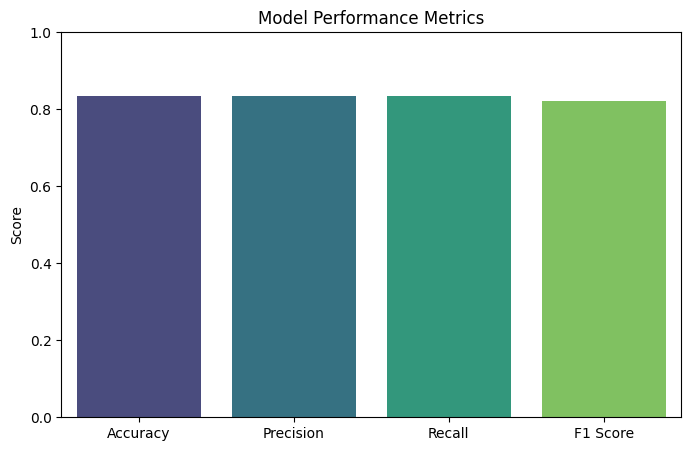

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load features
features_df = pd.read_csv('emg_features.csv')

# Split into features and labels
X = features_df.drop(columns=['class'])
y = features_df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate model
y_pred = clf.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Convert classification report to a DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues")
plt.title("Classification Report Heatmap")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_).plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Summary of key metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Plot a bar chart for key metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.ylim(0, 1)
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.show()


In [22]:
df2=pd.read_csv('/kaggle/working/preprocessed_emg_data.csv')
df2.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,Subject
0,1,0.012493,0.030260,0.023037,0.009925,-0.005863,0.014251,-0.008962,-0.006567,0.0,17
1,5,0.011880,0.015443,0.002915,0.005974,-0.014531,-0.001739,-0.000854,-0.006141,0.0,17
2,6,0.014194,0.000362,-0.016630,0.000173,-0.022253,-0.009488,-0.007235,-0.009708,0.0,17
3,7,0.010015,-0.013849,-0.035773,-0.001530,-0.031351,-0.033586,0.015517,-0.005165,0.0,17
4,8,0.015501,-0.028804,-0.054453,-0.009079,-0.037821,-0.032704,-0.006243,-0.012941,0.0,17


Raw Data Shape: (4237908, 11)
Preprocessed Data Shape: (4237908, 11)
Filtered Data Shape (Removed Class 0 & 7): (1499055, 11)
Class Distribution After Filtering:
class
6.0    253009
5.0    251733
4.0    251570
1.0    250055
3.0    249494
2.0    243193
Name: count, dtype: int64


/tmp/ipykernel_30/1078528988.py:81: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  'wavelet_energy': np.sum(cwt(signal, ricker, np.arange(1, 10)) ** 2),


Extracted Features Shape: (1273, 41)
Class Distribution After Feature Extraction:
class
5.0    220
4.0    219
6.0    214
1.0    210
3.0    209
2.0    201
Name: count, dtype: int64
Number of Classes: 6
Classes: [1. 2. 3. 4. 5. 6.]
Class Distribution After SMOTE:
0    220
1    220
2    220
3    220
4    220
5    220
Name: count, dtype: int64
Training Set Class Distribution:
1    176
0    176
3    176
2    176
5    176
4    176
Name: count, dtype: int64
Testing Set Class Distribution:
4    44
3    44
2    44
1    44
5    44
0    44
Name: count, dtype: int64
Class Weights: [1. 1. 1. 1. 1. 1.]
Training Features Shape: (1056, 8, 5)
Testing Features Shape: (264, 8, 5)
Using device: cuda
Epoch 1/30, Loss: 1.0929
Epoch 1/30, Weighted F1-Score: 0.3343
Best model saved.
Epoch 2/30, Loss: 0.9248
Epoch 2/30, Weighted F1-Score: 0.3497
Best model saved.
Epoch 3/30, Loss: 0.8882
Epoch 3/30, Weighted F1-Score: 0.3528
Best model saved.
Epoch 4/30, Loss: 0.8553
Epoch 4/30, Weighted F1-Score: 0.3567
Best 

/tmp/ipykernel_30/1078528988.py:413: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_emg_model.pth'))


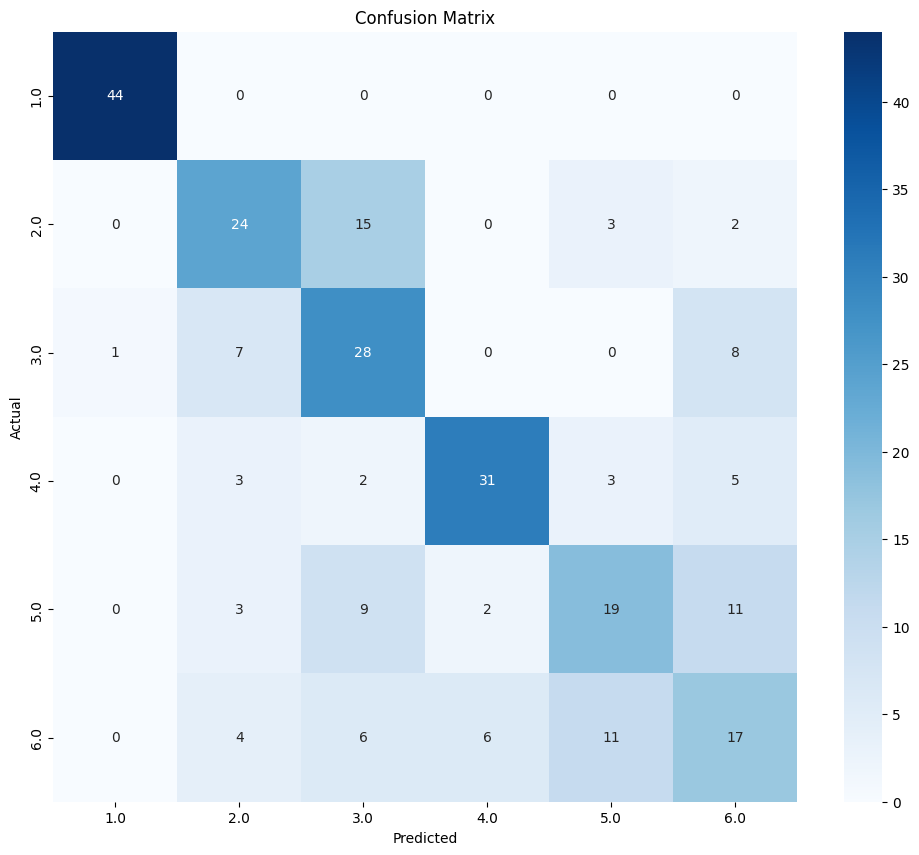

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch, cwt, ricker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from imblearn.over_sampling import SMOTE  # Install via pip if not available

# ===============================================
# 1. Signal Preprocessing
# ===============================================

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    """
    Apply a Butterworth bandpass filter to the data.

    Args:
        data (np.ndarray): Input signal.
        lowcut (float): Low cutoff frequency.
        highcut (float): High cutoff frequency.
        fs (float): Sampling frequency.
        order (int): Order of the filter.

    Returns:
        np.ndarray: Filtered signal.
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def preprocess_emg(data, fs=1000, lowcut=20, highcut=450):
    """
    Preprocess EMG signals by applying bandpass filter and normalization.

    Args:
        data (pd.DataFrame): Raw EMG data.
        fs (float): Sampling frequency.
        lowcut (float): Low cutoff frequency.
        highcut (float): High cutoff frequency.

    Returns:
        pd.DataFrame: Preprocessed EMG data.
    """
    for channel in range(1, 9):
        data[f'channel{channel}'] = bandpass_filter(data[f'channel{channel}'], lowcut, highcut, fs)
        # Normalize the signal
        mean = np.mean(data[f'channel{channel}'])
        std = np.std(data[f'channel{channel}'])
        if std == 0:
            std = 1  # Prevent division by zero
        data[f'channel{channel}'] = (data[f'channel{channel}'] - mean) / std
    return data

# ===============================================
# 2. Feature Engineering
# ===============================================

def compute_features(signal, fs=1000):
    """
    Compute statistical and frequency-domain features from a signal.

    Args:
        signal (np.ndarray): Input signal.
        fs (float): Sampling frequency.

    Returns:
        dict: Extracted features.
    """
    signal = np.asarray(signal)
    features = {
        'rms': np.sqrt(np.mean(signal ** 2)),
        'zcr': np.sum(np.diff(np.sign(signal)) != 0),
        'wavelet_energy': np.sum(cwt(signal, ricker, np.arange(1, 10)) ** 2),
        'psd_mean': np.mean(welch(signal, fs=fs)[1]),
        'psd_std': np.std(welch(signal, fs=fs)[1])
    }
    return features

def extract_features(data, window_size, overlap, fs=1000):
    """
    Extract features from EMG data using sliding window approach.

    Args:
        data (pd.DataFrame): Preprocessed EMG data.
        window_size (int): Number of samples per window.
        overlap (int): Number of overlapping samples between windows.
        fs (float): Sampling frequency.

    Returns:
        pd.DataFrame: DataFrame containing extracted features.
    """
    feature_list = []
    step_size = window_size - overlap
    num_samples = data.shape[0]
    num_windows = int(np.floor((num_samples - window_size) / step_size)) + 1

    for i in range(num_windows):
        start = int(i * step_size)
        end = int(start + window_size)
        window_data = data.iloc[start:end]

        # Ensure all classes in the window are the same
        if window_data['class'].nunique() != 1:
            continue  # Skip windows with mixed classes

        features = {}
        for channel in range(1, 9):
            signal = window_data[f'channel{channel}'].values
            channel_features = compute_features(signal, fs=fs)
            for key, value in channel_features.items():
                features[f'channel{channel}_{key}'] = value
        # Assign the class label as the mode of the window
        features['class'] = window_data['class'].mode()[0]
        feature_list.append(features)
    return pd.DataFrame(feature_list)

# ===============================================
# 3. Handling Class Imbalance with Focal Loss
# ===============================================

class FocalLoss(nn.Module):
    """
    Focal Loss for multi-class classification.
    """
    def __init__(self, alpha=None, gamma=2, reduction='mean'):
        """
        Initialize Focal Loss.

        Args:
            alpha (Tensor, optional): Class weights tensor.
            gamma (float): Focusing parameter.
            reduction (str): Reduction method ('none', 'mean', 'sum').
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        """
        Forward pass for Focal Loss.

        Args:
            inputs (Tensor): Predictions (logits) with shape (batch_size, num_classes).
            targets (Tensor): Ground truth labels with shape (batch_size).

        Returns:
            Tensor: Loss value.
        """
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# ===============================================
# 4. Deep Learning with Multi-Head Attention
# ===============================================

class EMGDataset(Dataset):
    """
    Custom Dataset for EMG data.
    """
    def __init__(self, features, labels):
        """
        Initialize the dataset.

        Args:
            features (np.ndarray): Feature matrix.
            labels (np.ndarray): Corresponding labels.
        """
        self.features = torch.tensor(features, dtype=torch.float32)  # shape: (num_samples, num_channels, num_features)
        self.labels = torch.tensor(labels, dtype=torch.long)         # shape: (num_samples)

    def __len__(self):
        """
        Return the number of samples.
        """
        return len(self.labels)

    def __getitem__(self, idx):
        """
        Retrieve a sample by index.

        Args:
            idx (int): Index of the sample.

        Returns:
            Tuple[Tensor, Tensor]: (feature, label)
        """
        return self.features[idx], self.labels[idx]

class MultiHeadAttentionModel(nn.Module):
    """
    Multi-Head Attention Model for classification.
    """
    def __init__(self, num_features_per_channel, num_classes, num_heads, hidden_dim):
        """
        Initialize the model.

        Args:
            num_features_per_channel (int): Number of features per channel.
            num_classes (int): Number of output classes.
            num_heads (int): Number of attention heads.
            hidden_dim (int): Dimension of hidden layers.
        """
        super(MultiHeadAttentionModel, self).__init__()
        self.embedding_dim = hidden_dim
        self.fc = nn.Linear(num_features_per_channel, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.fc_out = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            x (Tensor): Input tensor of shape (batch_size, num_channels, num_features_per_channel).

        Returns:
            Tensor: Output logits of shape (batch_size, num_classes).
        """
        x = self.relu(self.fc(x))           # x: (batch_size, num_channels, hidden_dim)
        x, _ = self.attention(x, x, x)      # Self-attention
        x = x.mean(dim=1)                    # Pool over channels -> (batch_size, hidden_dim)
        x = self.fc_out(x)                   # (batch_size, num_classes)
        return x

# ===============================================
# 5. Main Execution
# ===============================================

def main():
    # ===============================================
    # Load and Preprocess Dataset
    # ===============================================
    file_path = "/kaggle/working/preprocessed_emg_data.csv"  # Replace with your dataset path
    raw_data = pd.read_csv(file_path)
    preprocessed_data = preprocess_emg(raw_data)
    print(f"Raw Data Shape: {raw_data.shape}")
    print(f"Preprocessed Data Shape: {preprocessed_data.shape}")

    # ===============================================
    # Remove Class 0 and Class 7
    # ===============================================
    filtered_data = preprocessed_data[(preprocessed_data['class'] != 0) & (preprocessed_data['class'] != 7)]
    print(f"Filtered Data Shape (Removed Class 0 & 7): {filtered_data.shape}")
    print("Class Distribution After Filtering:")
    print(filtered_data['class'].value_counts())

    # ===============================================
    # Feature Extraction
    # ===============================================
    window_size = 1000  # Number of samples per window (e.g., 1 second if fs=1000 Hz)
    overlap = 500       # Number of samples to overlap between windows

    features_df = extract_features(filtered_data, window_size, overlap)
    features_df.to_csv('emg_features_filtered.csv', index=False)
    print(f"Extracted Features Shape: {features_df.shape}")
    print("Class Distribution After Feature Extraction:")
    print(features_df['class'].value_counts())

    # ===============================================
    # Prepare Dataset for PyTorch
    # ===============================================
    X = features_df.drop(columns=['class'])
    y = features_df['class']

    # Encode labels to integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    num_classes = len(np.unique(y_encoded))
    print(f"Number of Classes: {num_classes}")
    print(f"Classes: {label_encoder.classes_}")

    # ===============================================
    # Handle Class Imbalance with SMOTE
    # ===============================================
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y_encoded)
    print("Class Distribution After SMOTE:")
    print(pd.Series(y_resampled).value_counts())

    # ===============================================
    # Train-Test Split
    # ===============================================
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )
    print("Training Set Class Distribution:")
    print(pd.Series(y_train).value_counts())
    print("Testing Set Class Distribution:")
    print(pd.Series(y_test).value_counts())

    # ===============================================
    # Compute Class Weights
    # ===============================================
    class_counts = np.bincount(y_train)
    class_weights = 1. / class_counts
    class_weights = class_weights / class_weights.sum() * len(class_counts)
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)
    print(f"Class Weights: {class_weights}")

    # ===============================================
    # Scale Features
    # ===============================================
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ===============================================
    # Reshape Features for the Model
    # ===============================================
    num_features_per_channel = 5  # ['rms', 'zcr', 'wavelet_energy', 'psd_mean', 'psd_std']
    num_channels = 8
    X_train_reshaped = X_train_scaled.reshape(-1, num_channels, num_features_per_channel)
    X_test_reshaped = X_test_scaled.reshape(-1, num_channels, num_features_per_channel)
    print(f"Training Features Shape: {X_train_reshaped.shape}")
    print(f"Testing Features Shape: {X_test_reshaped.shape}")

    # ===============================================
    # Create Datasets and DataLoaders
    # ===============================================
    train_dataset = EMGDataset(X_train_reshaped, y_train)
    test_dataset = EMGDataset(X_test_reshaped, y_test)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # ===============================================
    # Initialize the Model
    # ===============================================
    model = MultiHeadAttentionModel(
        num_features_per_channel=num_features_per_channel,
        num_classes=num_classes,
        num_heads=4,
        hidden_dim=128
    )

    # Move model to device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Using device: {device}")

    # ===============================================
    # Define Loss Function and Optimizer
    # ===============================================
    criterion = FocalLoss(alpha=class_weights_tensor.to(device), gamma=2, reduction='mean')
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # ===============================================
    # Training Loop
    # ===============================================
    epochs = 30  # Increased epochs for better learning
    best_f1 = 0.0
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for batch_idx, (features, labels) in enumerate(train_loader):
            features, labels = features.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_train_loss:.4f}")

        # Optional: Evaluate on test set each epoch
        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for features, labels in test_loader:
                features, labels = features.to(device), labels.to(device)
                outputs = model(features)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Compute F1-score
        report = classification_report(all_labels, all_preds, output_dict=True, zero_division=0)
        f1 = report['weighted avg']['f1-score']
        print(f"Epoch {epoch+1}/{epochs}, Weighted F1-Score: {f1:.4f}")

        # Save the best model
        if f1 > best_f1:
            best_f1 = f1
            torch.save(model.state_dict(), 'best_emg_model.pth')
            print("Best model saved.")

    # ===============================================
    # Evaluation
    # ===============================================
    # Load the best model
    model.load_state_dict(torch.load('best_emg_model.pth'))
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert class labels to strings for target_names
    target_names = [str(cls) for cls in label_encoder.classes_]

    # Classification report
    print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=target_names, zero_division=0))

    # Confusion Matrix Visualization
    conf_matrix = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=target_names,
                yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

if __name__ == "__main__":
    main()


Raw Data Shape: (4237908, 11)
Preprocessed Data Shape: (4237908, 11)
Filtered Data Shape (Removed Class 0 & 7): (1499055, 11)
Class Distribution After Filtering:
class
6.0    253009
5.0    251733
4.0    251570
1.0    250055
3.0    249494
2.0    243193
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


Extracted Features Shape: (11991, 41)
Class Distribution After Feature Extraction:
class
6.0    2018
5.0    2015
4.0    2013
1.0    2002
3.0    1992
2.0    1951
Name: count, dtype: int64
Number of Classes: 6
Classes: [1. 2. 3. 4. 5. 6.]
Class Distribution Before Handling Imbalance:
5    2018
4    2015
3    2013
0    2002
2    1992
1    1951
Name: count, dtype: int64
Training Set Class Distribution:
5    1614
4    1612
3    1610
0    1601
2    1594
1    1561
Name: count, dtype: int64
Testing Set Class Distribution:
5    404
3    403
4    403
0    401
2    398
1    390
Name: count, dtype: int64
Class Weights: [0.99841125 1.02399514 1.00279574 0.99283007 0.99159827 0.99036952]
Training Features Shape: (9592, 8, 5)
Testing Features Shape: (2399, 8, 5)
Using device: cuda
Epoch 1/30, Loss: 0.9529
Epoch 1/30, Weighted F1-Score: 0.3750
Best model saved.
Epoch 2/30, Loss: 0.8548
Epoch 2/30, Weighted F1-Score: 0.4216
Best model saved.
Epoch 3/30, Loss: 0.7844
Epoch 3/30, Weighted F1-Score: 0.491

/tmp/ipykernel_30/3267087405.py:460: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_emg_model.pth'))


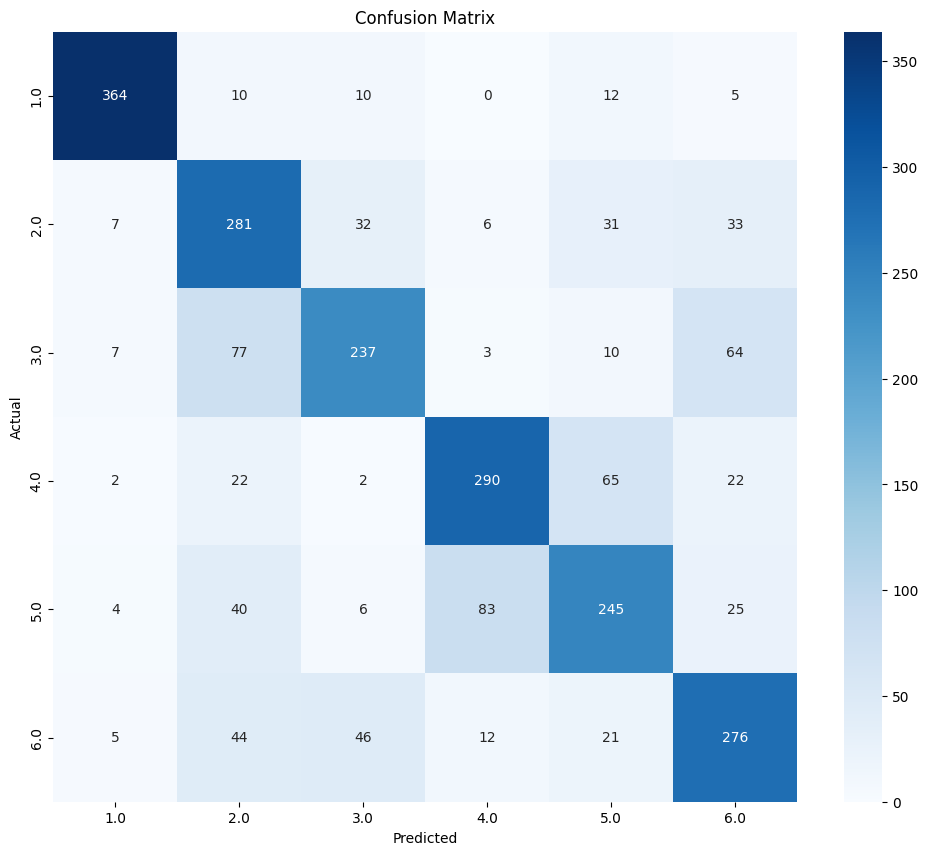

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import pywt  # Ensure PyWavelets is installed: pip install PyWavelets
import random

# ===============================================
# 1. Signal Preprocessing
# ===============================================

def set_seed(seed=42):
    """
    Set seed for reproducibility.
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    """
    Apply a Butterworth bandpass filter to the data.

    Args:
        data (np.ndarray): Input signal.
        lowcut (float): Low cutoff frequency.
        highcut (float): High cutoff frequency.
        fs (float): Sampling frequency.
        order (int): Order of the filter.

    Returns:
        np.ndarray: Filtered signal.
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def preprocess_emg(data, fs=1000, lowcut=20, highcut=450):
    """
    Preprocess EMG signals by applying bandpass filter and normalization.

    Args:
        data (pd.DataFrame): Raw EMG data.
        fs (float): Sampling frequency.
        lowcut (float): Low cutoff frequency.
        highcut (float): High cutoff frequency.

    Returns:
        pd.DataFrame: Preprocessed EMG data.
    """
    for channel in range(1, 9):
        data[f'channel{channel}'] = bandpass_filter(data[f'channel{channel}'], lowcut, highcut, fs)
        # Normalize the signal
        mean = np.mean(data[f'channel{channel}'])
        std = np.std(data[f'channel{channel}'])
        if std == 0:
            std = 1  # Prevent division by zero
        data[f'channel{channel}'] = (data[f'channel{channel}'] - mean) / std
    return data

# ===============================================
# 2. Feature Engineering
# ===============================================

def compute_wavelet_energy(signal, wavelet='db4', level=4):
    """
    Compute wavelet energy using PyWavelets.

    Args:
        signal (np.ndarray): Input signal.
        wavelet (str): Wavelet type.
        level (int): Wavelet decomposition level.

    Returns:
        float: Wavelet energy.
    """
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    energy = sum([np.sum(c ** 2) for c in coeffs])
    return energy

def compute_features(signal, fs=1000):
    """
    Compute statistical and frequency-domain features from a signal.

    Args:
        signal (np.ndarray): Input signal.
        fs (float): Sampling frequency.

    Returns:
        dict: Extracted features.
    """
    signal = np.asarray(signal)
    features = {
        'rms': np.sqrt(np.mean(signal ** 2)),
        'zcr': np.sum(np.diff(np.sign(signal)) != 0),
        'wavelet_energy': compute_wavelet_energy(signal, wavelet='db4', level=4),
        'psd_mean': np.mean(welch(signal, fs=fs)[1]),
        'psd_std': np.std(welch(signal, fs=fs)[1])
    }
    return features

def extract_features(data, window_size, overlap, fs=1000):
    """
    Extract features from EMG data using sliding window approach.

    Args:
        data (pd.DataFrame): Preprocessed EMG data.
        window_size (int): Number of samples per window.
        overlap (int): Number of overlapping samples between windows.
        fs (float): Sampling frequency.

    Returns:
        pd.DataFrame: DataFrame containing extracted features.
    """
    feature_list = []
    step_size = window_size - overlap
    num_samples = data.shape[0]
    num_windows = int(np.floor((num_samples - window_size) / step_size)) + 1

    for i in range(num_windows):
        start = int(i * step_size)
        end = int(start + window_size)
        window_data = data.iloc[start:end]

        # Assign the class label as the mode of the window
        class_mode = window_data['class'].mode()
        if class_mode.empty:
            continue
        class_label = class_mode[0]

        features = {}
        for channel in range(1, 9):
            signal = window_data[f'channel{channel}'].values
            channel_features = compute_features(signal, fs=fs)
            for key, value in channel_features.items():
                features[f'channel{channel}_{key}'] = value
        features['class'] = class_label
        feature_list.append(features)
    return pd.DataFrame(feature_list)

# ===============================================
# 3. Handling Class Imbalance with Focal Loss
# ===============================================

class FocalLoss(nn.Module):
    """
    Focal Loss for multi-class classification.
    """
    def __init__(self, alpha=None, gamma=2, reduction='mean'):
        """
        Initialize Focal Loss.

        Args:
            alpha (Tensor, optional): Class weights tensor.
            gamma (float): Focusing parameter.
            reduction (str): Reduction method ('none', 'mean', 'sum').
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        """
        Forward pass for Focal Loss.

        Args:
            inputs (Tensor): Predictions (logits) with shape (batch_size, num_classes).
            targets (Tensor): Ground truth labels with shape (batch_size).

        Returns:
            Tensor: Loss value.
        """
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# ===============================================
# 4. Deep Learning with Multi-Head Attention
# ===============================================

class EMGDataset(Dataset):
    """
    Custom Dataset for EMG data.
    """
    def __init__(self, features, labels):
        """
        Initialize the dataset.

        Args:
            features (np.ndarray): Feature matrix.
            labels (np.ndarray): Corresponding labels.
        """
        self.features = torch.tensor(features, dtype=torch.float32)  # shape: (num_samples, num_channels, num_features)
        self.labels = torch.tensor(labels, dtype=torch.long)         # shape: (num_samples)

    def __len__(self):
        """
        Return the number of samples.
        """
        return len(self.labels)

    def __getitem__(self, idx):
        """
        Retrieve a sample by index.

        Args:
            idx (int): Index of the sample.

        Returns:
            Tuple[Tensor, Tensor]: (feature, label)
        """
        return self.features[idx], self.labels[idx]

class MultiHeadAttentionModel(nn.Module):
    """
    Multi-Head Attention Model for classification.
    """
    def __init__(self, num_features_per_channel, num_classes, num_heads, hidden_dim):
        """
        Initialize the model.

        Args:
            num_features_per_channel (int): Number of features per channel.
            num_classes (int): Number of output classes.
            num_heads (int): Number of attention heads.
            hidden_dim (int): Dimension of hidden layers.
        """
        super(MultiHeadAttentionModel, self).__init__()
        self.embedding_dim = hidden_dim
        self.fc = nn.Linear(num_features_per_channel, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.fc_out = nn.Linear(hidden_dim, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)  # Added dropout

    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            x (Tensor): Input tensor of shape (batch_size, num_channels, num_features_per_channel).

        Returns:
            Tensor: Output logits of shape (batch_size, num_classes).
        """
        x = self.relu(self.fc(x))           # x: (batch_size, num_channels, hidden_dim)
        x = self.dropout(x)                  # Apply dropout
        x, _ = self.attention(x, x, x)      # Self-attention
        x = self.dropout(x)                  # Apply dropout
        x = x.mean(dim=1)                    # Pool over channels -> (batch_size, hidden_dim)
        x = self.fc_out(x)                   # (batch_size, num_classes)
        return x

# ===============================================
# 5. Main Execution
# ===============================================

def main():
    set_seed(42)

    # ===============================================
    # Load and Preprocess Dataset
    # ===============================================
    file_path = "/kaggle/working/preprocessed_emg_data.csv"  # Replace with your dataset path
    raw_data = pd.read_csv(file_path)
    preprocessed_data = preprocess_emg(raw_data)
    print(f"Raw Data Shape: {raw_data.shape}")
    print(f"Preprocessed Data Shape: {preprocessed_data.shape}")

    # ===============================================
    # Remove Class 0 and Class 7
    # ===============================================
    filtered_data = preprocessed_data[(preprocessed_data['class'] != 0) & (preprocessed_data['class'] != 7)]
    print(f"Filtered Data Shape (Removed Class 0 & 7): {filtered_data.shape}")
    print("Class Distribution After Filtering:")
    print(filtered_data['class'].value_counts())

    # ===============================================
    # Feature Extraction
    # ===============================================
    window_size = 250  # Number of samples per window (0.25 sec if fs=1000 Hz)
    overlap = 125      # Overlap of 50% (step_size=125)

    features_df = extract_features(filtered_data, window_size, overlap)
    features_df.to_csv('emg_features_filtered.csv', index=False)
    print(f"Extracted Features Shape: {features_df.shape}")
    print("Class Distribution After Feature Extraction:")
    print(features_df['class'].value_counts())

    # ===============================================
    # Prepare Dataset for PyTorch
    # ===============================================
    X = features_df.drop(columns=['class'])
    y = features_df['class']

    # Encode labels to integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    num_classes = len(np.unique(y_encoded))
    print(f"Number of Classes: {num_classes}")
    print(f"Classes: {label_encoder.classes_}")

    # ===============================================
    # Handle Class Imbalance (Optional)
    # ===============================================
    # Check class distribution
    class_counts = pd.Series(y_encoded).value_counts()
    print("Class Distribution Before Handling Imbalance:")
    print(class_counts)

    # Optionally, apply SMOTE if classes are imbalanced
    # Here, classes are roughly balanced after windowing
    # Uncomment the following lines if needed
    # smote = SMOTE(random_state=42)
    # X_resampled, y_resampled = smote.fit_resample(X, y_encoded)
    # print("Class Distribution After SMOTE:")
    # print(pd.Series(y_resampled).value_counts())

    # For this case, we'll proceed without SMOTE
    X_resampled, y_resampled = X, y_encoded

    # ===============================================
    # Train-Test Split
    # ===============================================
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )
    print("Training Set Class Distribution:")
    print(pd.Series(y_train).value_counts())
    print("Testing Set Class Distribution:")
    print(pd.Series(y_test).value_counts())

    # ===============================================
    # Compute Class Weights
    # ===============================================
    class_counts = np.bincount(y_train)
    class_weights = 1. / class_counts
    class_weights = class_weights / class_weights.sum() * len(class_counts)
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)
    print(f"Class Weights: {class_weights}")

    # ===============================================
    # Scale Features
    # ===============================================
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ===============================================
    # Reshape Features for the Model
    # ===============================================
    num_features_per_channel = 5  # ['rms', 'zcr', 'wavelet_energy', 'psd_mean', 'psd_std']
    num_channels = 8
    X_train_reshaped = X_train_scaled.reshape(-1, num_channels, num_features_per_channel)
    X_test_reshaped = X_test_scaled.reshape(-1, num_channels, num_features_per_channel)
    print(f"Training Features Shape: {X_train_reshaped.shape}")
    print(f"Testing Features Shape: {X_test_reshaped.shape}")

    # ===============================================
    # Create Datasets and DataLoaders
    # ===============================================
    train_dataset = EMGDataset(X_train_reshaped, y_train)
    test_dataset = EMGDataset(X_test_reshaped, y_test)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # ===============================================
    # Initialize the Model
    # ===============================================
    model = MultiHeadAttentionModel(
        num_features_per_channel=num_features_per_channel,
        num_classes=num_classes,
        num_heads=4,
        hidden_dim=128
    )

    # Move model to device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Using device: {device}")

    # ===============================================
    # Define Loss Function and Optimizer
    # ===============================================
    # Use class weights to handle imbalance
    criterion = FocalLoss(alpha=class_weights_tensor.to(device), gamma=2, reduction='mean')
    # Alternatively, use CrossEntropyLoss with class weights
    # criterion = nn.CrossEntropyLoss(weight=class_weights_tensor.to(device))
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # ===============================================
    # Training Loop
    # ===============================================
    epochs = 30  # Increased epochs for better learning
    best_f1 = 0.0
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for batch_idx, (features, labels) in enumerate(train_loader):
            features, labels = features.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_train_loss:.4f}")

        # Evaluate on test set
        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for features, labels in test_loader:
                features, labels = features.to(device), labels.to(device)
                outputs = model(features)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Compute F1-score
        report = classification_report(all_labels, all_preds, output_dict=True, zero_division=0)
        f1 = report['weighted avg']['f1-score']
        print(f"Epoch {epoch+1}/{epochs}, Weighted F1-Score: {f1:.4f}")

        # Save the best model
        if f1 > best_f1:
            best_f1 = f1
            torch.save(model.state_dict(), 'best_emg_model.pth')
            print("Best model saved.")

    # ===============================================
    # Evaluation
    # ===============================================
    # Load the best model
    model.load_state_dict(torch.load('best_emg_model.pth'))
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert class labels to strings for target_names
    target_names = [str(cls) for cls in label_encoder.classes_]

    # Classification report
    print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=target_names, zero_division=0))

    # Confusion Matrix Visualization
    conf_matrix = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=target_names,
                yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

if __name__ == "__main__":
    main()


Raw Data Shape: (4237908, 11)
Preprocessed Data Shape: (4237908, 11)
Filtered Data Shape (Removed Class 0 & 7): (1499055, 11)
Class Distribution After Filtering:
class
6.0    253009
5.0    251733
4.0    251570
1.0    250055
3.0    249494
2.0    243193
Name: count, dtype: int64
Extracted Features Shape: (11991, 81)
Class Distribution After Feature Extraction:
class
6.0    2018
5.0    2015
4.0    2013
1.0    2002
3.0    1992
2.0    1951
Name: count, dtype: int64
Number of Classes: 6
Classes: [1. 2. 3. 4. 5. 6.]
Class Distribution Before Handling Imbalance:
5    2018
4    2015
3    2013
0    2002
2    1992
1    1951
Name: count, dtype: int64
Training Set Class Distribution:
5    1614
4    1612
3    1610
0    1601
2    1594
1    1561
Name: count, dtype: int64
Testing Set Class Distribution:
5    404
3    403
4    403
0    401
2    398
1    390
Name: count, dtype: int64
Class Weights: [0.99841125 1.02399514 1.00279574 0.99283007 0.99159827 0.99036952]
Training Features Shape: (9592, 8, 10)


/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1, Training Loss: 0.7525
Weighted F1-Score: 0.6782
Best model saved.
Epoch 2, Training Loss: 0.4893
Weighted F1-Score: 0.7193
Best model saved.
Epoch 3, Training Loss: 0.4469
Weighted F1-Score: 0.7342
Best model saved.
Epoch 4, Training Loss: 0.4172
Weighted F1-Score: 0.7541
Best model saved.
Epoch 5, Training Loss: 0.3986
Weighted F1-Score: 0.7645
Best model saved.
Epoch 6, Training Loss: 0.3896
Weighted F1-Score: 0.7627
No improvement for 1 epochs.
Epoch 7, Training Loss: 0.3689
Weighted F1-Score: 0.7717
Best model saved.
Epoch 8, Training Loss: 0.3582
Weighted F1-Score: 0.7802
Best model saved.
Epoch 9, Training Loss: 0.3454
Weighted F1-Score: 0.7865
Best model saved.
Epoch 10, Training Loss: 0.3335
Weighted F1-Score: 0.7892
Best model saved.
Epoch 11, Training Loss: 0.3344
Weighted F1-Score: 0.7823
No improvement for 1 epochs.
Epoch 12, Training Loss: 0.3171
Weighted F1-Score: 0.7967
Best model saved.
Epoch 13, Training Loss: 0.3186
Weighted F1-Score: 0.7882
No improvement fo

/tmp/ipykernel_30/1006629768.py:592: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_emg_model.pth'))


Classification Report:
               precision    recall  f1-score   support

         1.0       0.93      0.91      0.92       401
         2.0       0.89      0.90      0.89       390
         3.0       0.80      0.75      0.77       398
         4.0       0.82      0.82      0.82       403
         5.0       0.81      0.82      0.82       403
         6.0       0.77      0.81      0.79       404

    accuracy                           0.83      2399
   macro avg       0.84      0.83      0.83      2399
weighted avg       0.83      0.83      0.83      2399



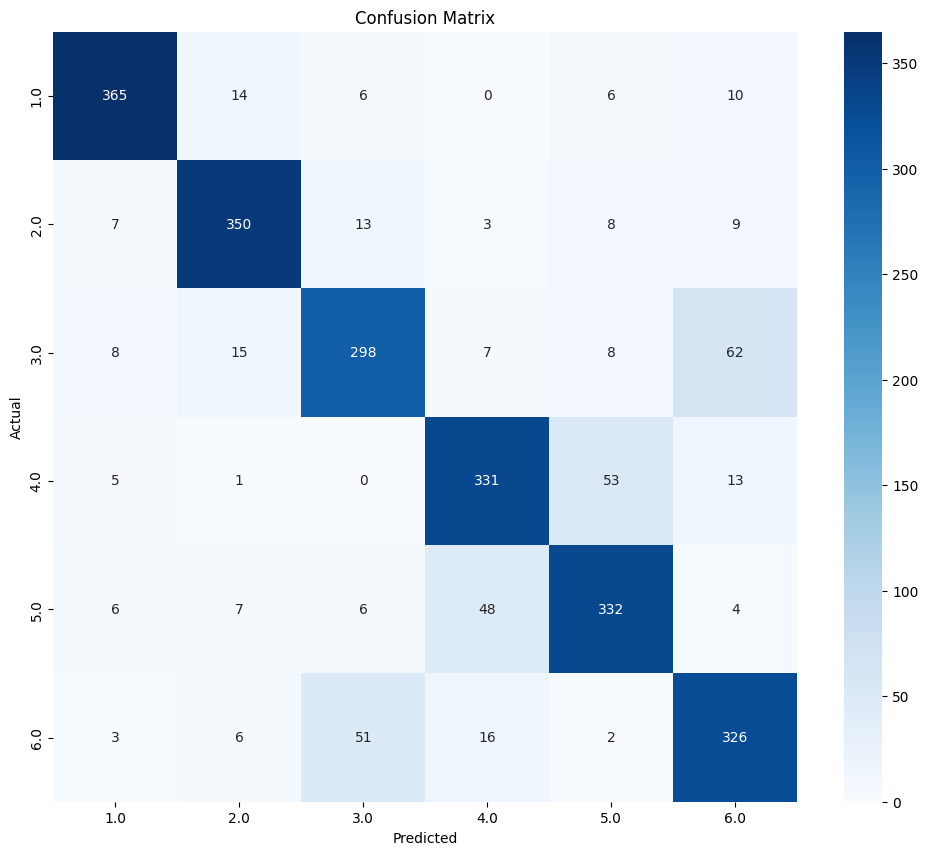

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt  # Ensure PyWavelets is installed: pip install PyWavelets
from scipy.signal import butter, filtfilt, welch
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import os

# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# ===============================================
# 1. Signal Preprocessing
# ===============================================

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    """
    Apply a Butterworth bandpass filter to the data.

    Args:
        data (np.ndarray): Input signal.
        lowcut (float): Low cutoff frequency.
        highcut (float): High cutoff frequency.
        fs (float): Sampling frequency.
        order (int): Order of the filter.

    Returns:
        np.ndarray: Filtered signal.
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def preprocess_emg(data, fs=1000, lowcut=20, highcut=450):
    """
    Preprocess EMG signals by applying bandpass filter and normalization.

    Args:
        data (pd.DataFrame): Raw EMG data.
        fs (float): Sampling frequency.
        lowcut (float): Low cutoff frequency.
        highcut (float): High cutoff frequency.

    Returns:
        pd.DataFrame: Preprocessed EMG data.
    """
    for channel in range(1, 9):
        data[f'channel{channel}'] = bandpass_filter(data[f'channel{channel}'], lowcut, highcut, fs)
        # Normalize the signal
        mean = np.mean(data[f'channel{channel}'])
        std = np.std(data[f'channel{channel}'])
        if std == 0:
            std = 1  # Prevent division by zero
        data[f'channel{channel}'] = (data[f'channel{channel}'] - mean) / std
    return data

# ===============================================
# 2. Feature Engineering
# ===============================================

def compute_wavelet_energy(signal, wavelet='db4', level=4):
    """
    Compute wavelet energy using PyWavelets.

    Args:
        signal (np.ndarray): Input signal.
        wavelet (str): Wavelet type.
        level (int): Wavelet decomposition level.

    Returns:
        float: Wavelet energy.
    """
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    energy = sum([np.sum(c ** 2) for c in coeffs])
    return energy

def compute_features(signal, fs=1000):
    """
    Compute statistical and frequency-domain features from a signal.

    Args:
        signal (np.ndarray): Input signal.
        fs (float): Sampling frequency.

    Returns:
        dict: Extracted features.
    """
    signal = np.asarray(signal)
    Pxx = welch(signal, fs=fs, nperseg=len(signal))[1]  # Set nperseg to signal length
    features = {
        'rms': np.sqrt(np.mean(signal ** 2)),
        'zcr': np.sum(np.diff(np.sign(signal)) != 0),
        'wavelet_energy': compute_wavelet_energy(signal, wavelet='db4', level=4),
        'psd_mean': np.mean(Pxx),
        'psd_std': np.std(Pxx)
    }
    return features

def compute_additional_features(signal, fs=1000):
    """
    Compute additional time and frequency domain features.

    Args:
        signal (np.ndarray): Input signal.
        fs (float): Sampling frequency.

    Returns:
        dict: Additional features.
    """
    features = {}
    # Time-Domain Features
    features['mav'] = np.mean(np.abs(signal))
    features['var'] = np.var(signal)
    features['ssc'] = np.sum(np.diff(np.sign(np.diff(signal))) != 0)
    
    # Frequency-Domain Features
    f, Pxx = welch(signal, fs=fs, nperseg=len(signal))  # Set nperseg to signal length
    features['median_freq'] = np.median(f)
    features['peak_freq'] = f[np.argmax(Pxx)]
    
    return features

def extract_additional_features(data, window_size, overlap, fs=1000):
    """
    Extract additional features from EMG data using sliding window approach.

    Args:
        data (pd.DataFrame): Preprocessed EMG data.
        window_size (int): Number of samples per window.
        overlap (int): Number of overlapping samples between windows.
        fs (float): Sampling frequency.

    Returns:
        pd.DataFrame: DataFrame containing extracted features.
    """
    feature_list = []
    step_size = window_size - overlap
    num_samples = data.shape[0]
    num_windows = int(np.floor((num_samples - window_size) / step_size)) + 1

    for i in range(num_windows):
        start = int(i * step_size)
        end = int(start + window_size)
        window_data = data.iloc[start:end]

        # Assign the class label as the majority class in the window
        class_label = window_data['class'].mode()
        if class_label.empty:
            continue
        class_label = class_label[0]

        features = {}
        for channel in range(1, 9):
            signal = window_data[f'channel{channel}'].values
            time_features = compute_features(signal, fs=fs)
            additional_time_features = compute_additional_features(signal, fs=fs)
            
            # Combine all features
            for key, value in time_features.items():
                features[f'channel{channel}_{key}'] = value
            for key, value in additional_time_features.items():
                features[f'channel{channel}_{key}'] = value

        features['class'] = class_label
        feature_list.append(features)
    return pd.DataFrame(feature_list)

# ===============================================
# 3. Handling Class Imbalance with Focal Loss
# ===============================================

class FocalLoss(nn.Module):
    """
    Focal Loss for multi-class classification.
    """
    def __init__(self, alpha=None, gamma=2, reduction='mean'):
        """
        Initialize Focal Loss.

        Args:
            alpha (Tensor, optional): Class weights tensor.
            gamma (float): Focusing parameter.
            reduction (str): Reduction method ('none', 'mean', 'sum').
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        """
        Forward pass for Focal Loss.

        Args:
            inputs (Tensor): Predictions (logits) with shape (batch_size, num_classes).
            targets (Tensor): Ground truth labels with shape (batch_size).

        Returns:
            Tensor: Loss value.
        """
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# ===============================================
# 4. Deep Learning with Enhanced Architecture
# ===============================================

class EMGDataset(Dataset):
    """
    Custom Dataset for EMG data.
    """
    def __init__(self, features, labels):
        """
        Initialize the dataset.

        Args:
            features (np.ndarray): Feature matrix.
            labels (np.ndarray): Corresponding labels.
        """
        self.features = torch.tensor(features, dtype=torch.float32)  # shape: (num_samples, num_channels, num_features)
        self.labels = torch.tensor(labels, dtype=torch.long)         # shape: (num_samples)

    def __len__(self):
        """
        Return the number of samples.
        """
        return len(self.labels)

    def __getitem__(self, idx):
        """
        Retrieve a sample by index.

        Args:
            idx (int): Index of the sample.

        Returns:
            Tuple[Tensor, Tensor]: (feature, label)
        """
        return self.features[idx], self.labels[idx]

class EnhancedEMGModel(nn.Module):
    """
    Enhanced Multi-Head Attention Model with Convolutional Layers and Batch Normalization.
    """
    def __init__(self, num_channels, num_features_per_channel, num_classes, num_heads, hidden_dim):
        """
        Initialize the model.

        Args:
            num_channels (int): Number of input channels.
            num_features_per_channel (int): Number of features per channel.
            num_classes (int): Number of output classes.
            num_heads (int): Number of attention heads.
            hidden_dim (int): Dimension of hidden layers.
        """
        super(EnhancedEMGModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=num_channels, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(16)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(32)

        self.fc = nn.Linear(32, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.fc_out = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            x (Tensor): Input tensor of shape (batch_size, num_channels, num_features_per_channel).

        Returns:
            Tensor: Output logits of shape (batch_size, num_classes).
        """
        # Apply Convolutional Layers
        x = self.conv1(x)            # (batch_size, 16, num_features)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.conv2(x)            # (batch_size, 32, num_features)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Permute to match MultiheadAttention expected input
        x = x.permute(0, 2, 1)        # (batch_size, num_features, 32)

        x = self.fc(x)                # (batch_size, num_features, hidden_dim)
        x = self.relu(x)
        x = self.dropout(x)

        # Apply Multi-Head Attention
        x, _ = self.attention(x, x, x)  # (batch_size, num_features, hidden_dim)
        x = self.dropout(x)

        # Pool over features (e.g., average pooling)
        x = x.mean(dim=1)               # (batch_size, hidden_dim)

        # Final Output Layer
        x = self.fc_out(x)              # (batch_size, num_classes)
        return x

# ===============================================
# 5. Training and Evaluation Utilities
# ===============================================

def train_model(model, device, train_loader, criterion, optimizer, epoch):
    """
    Train the model for one epoch.

    Args:
        model (nn.Module): The neural network model.
        device (torch.device): Device to run the training on.
        train_loader (DataLoader): DataLoader for training data.
        criterion (nn.Module): Loss function.
        optimizer (torch.optim.Optimizer): Optimizer.
        epoch (int): Current epoch number.

    Returns:
        float: Average training loss.
    """
    model.train()
    train_loss = 0.0
    for batch_idx, (features, labels) in enumerate(train_loader):
        features, labels = features.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        optimizer.step()

        train_loss += loss.item()

    avg_loss = train_loss / len(train_loader)
    print(f"Epoch {epoch}, Training Loss: {avg_loss:.4f}")
    return avg_loss

def evaluate_model(model, device, test_loader, label_encoder):
    """
    Evaluate the model on the test set.

    Args:
        model (nn.Module): The neural network model.
        device (torch.device): Device to run the evaluation on.
        test_loader (DataLoader): DataLoader for test data.
        label_encoder (LabelEncoder): Encoder to decode class labels.

    Returns:
        float: Weighted F1-score.
    """
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute weighted F1-score
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"Weighted F1-Score: {f1:.4f}")
    return f1, all_labels, all_preds

def plot_confusion_matrix(all_labels, all_preds, label_encoder):
    """
    Plot the confusion matrix.

    Args:
        all_labels (list): True labels.
        all_preds (list): Predicted labels.
        label_encoder (LabelEncoder): Encoder to decode class labels.
    """
    conf_matrix = confusion_matrix(all_labels, all_preds)
    target_names = [str(cls) for cls in label_encoder.classes_]

    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=target_names,
                yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# ===============================================
# 6. Main Execution
# ===============================================

def main():
    set_seed(42)

    # ===============================================
    # Load and Preprocess Dataset
    # ===============================================
    file_path = "/kaggle/working/preprocessed_emg_data.csv"  # Replace with your dataset path
    raw_data = pd.read_csv(file_path)
    print(f"Raw Data Shape: {raw_data.shape}")

    preprocessed_data = preprocess_emg(raw_data)
    print(f"Preprocessed Data Shape: {preprocessed_data.shape}")

    # ===============================================
    # Remove Class 0 and Class 7
    # ===============================================
    filtered_data = preprocessed_data[(preprocessed_data['class'] != 0) & (preprocessed_data['class'] != 7)]
    print(f"Filtered Data Shape (Removed Class 0 & 7): {filtered_data.shape}")
    print("Class Distribution After Filtering:")
    print(filtered_data['class'].value_counts())

    # ===============================================
    # Feature Extraction
    # ===============================================
    window_size = 250  # Number of samples per window (0.25 sec if fs=1000 Hz)
    overlap = 125       # Overlap of 50% (step_size=125)

    features_df = extract_additional_features(filtered_data, window_size, overlap)
    features_df.to_csv('emg_features_enhanced.csv', index=False)
    print(f"Extracted Features Shape: {features_df.shape}")
    print("Class Distribution After Feature Extraction:")
    print(features_df['class'].value_counts())

    # ===============================================
    # Prepare Dataset for PyTorch
    # ===============================================
    X = features_df.drop(columns=['class'])
    y = features_df['class']

    # Encode labels to integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    num_classes = len(np.unique(y_encoded))
    print(f"Number of Classes: {num_classes}")
    print(f"Classes: {label_encoder.classes_}")

    # ===============================================
    # Handle Class Imbalance
    # ===============================================
    # Check class distribution
    class_counts = pd.Series(y_encoded).value_counts()
    print("Class Distribution Before Handling Imbalance:")
    print(class_counts)

    # Since after feature extraction, classes are roughly balanced, no need for SMOTE
    # Proceeding without SMOTE
    X_resampled, y_resampled = X, y_encoded

    # ===============================================
    # Train-Test Split
    # ===============================================
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )
    print("Training Set Class Distribution:")
    print(pd.Series(y_train).value_counts())
    print("Testing Set Class Distribution:")
    print(pd.Series(y_test).value_counts())

    # ===============================================
    # Compute Class Weights
    # ===============================================
    class_counts = np.bincount(y_train)
    class_weights = 1. / class_counts
    class_weights = class_weights / class_weights.sum() * len(class_counts)
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)
    print(f"Class Weights: {class_weights}")

    # ===============================================
    # Scale Features
    # ===============================================
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ===============================================
    # Reshape Features for the Model
    # ===============================================
    num_features_per_channel = 10  # ['rms', 'zcr', 'wavelet_energy', 'psd_mean', 'psd_std',
                                   # 'mav', 'var', 'ssc', 'median_freq', 'peak_freq']
    num_channels = 8
    X_train_reshaped = X_train_scaled.reshape(-1, num_channels, num_features_per_channel)
    X_test_reshaped = X_test_scaled.reshape(-1, num_channels, num_features_per_channel)
    print(f"Training Features Shape: {X_train_reshaped.shape}")
    print(f"Testing Features Shape: {X_test_reshaped.shape}")

    # ===============================================
    # Create Datasets and DataLoaders
    # ===============================================
    train_dataset = EMGDataset(X_train_reshaped, y_train)
    test_dataset = EMGDataset(X_test_reshaped, y_test)

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

    # ===============================================
    # Initialize the Enhanced Model
    # ===============================================
    model = EnhancedEMGModel(
        num_channels=num_channels,
        num_features_per_channel=num_features_per_channel,
        num_classes=num_classes,
        num_heads=4,
        hidden_dim=128
    )

    # Print model architecture to verify
    print(model)

    # Move model to device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Using device: {device}")

    # ===============================================
    # Define Loss Function, Optimizer, and Scheduler
    # ===============================================
    # Use class weights to handle imbalance
    criterion = FocalLoss(alpha=class_weights_tensor.to(device), gamma=2, reduction='mean')
    # Alternatively, use CrossEntropyLoss with class weights
    # criterion = nn.CrossEntropyLoss(weight=class_weights_tensor.to(device))

    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)

    # ===============================================
    # Training Loop with Enhanced Strategies
    # ===============================================
    epochs = 100  # Increased epochs for better learning
    best_f1 = 0.0
    patience = 17  # Early stopping patience
    trigger_times = 0

    for epoch in range(1, epochs + 1):
        # Training Phase
        train_loss = train_model(model, device, train_loader, criterion, optimizer, epoch)

        # Evaluation Phase
        f1, _, _ = evaluate_model(model, device, test_loader, label_encoder)

        # Step the scheduler
        scheduler.step(f1)

        # Check for improvement
        if f1 > best_f1:
            best_f1 = f1
            torch.save(model.state_dict(), 'best_emg_model.pth')
            print("Best model saved.")
            trigger_times = 0
        else:
            trigger_times += 1
            print(f"No improvement for {trigger_times} epochs.")
            if trigger_times >= patience:
                print("Early stopping triggered.")
                break

    # ===============================================
    # Final Evaluation
    # ===============================================
    # Load the best model
    model.load_state_dict(torch.load('best_emg_model.pth'))
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert class labels to strings for target_names
    target_names = [str(cls) for cls in label_encoder.classes_]

    # Classification report
    print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=target_names, zero_division=0))

    # Confusion Matrix Visualization
    plot_confusion_matrix(all_labels, all_preds, label_encoder)

if __name__ == "__main__":
    main()


Raw Data Shape: (4237908, 11)
Preprocessed Data Shape: (4237908, 11)
Filtered Data Shape (Removed Class 0 & 7): (1499055, 11)
Class Distribution After Filtering:
class
6.0    253009
5.0    251733
4.0    251570
1.0    250055
3.0    249494
2.0    243193
Name: count, dtype: int64
Extracted Features Shape: (11991, 81)
Class Distribution After Feature Extraction:
class
6.0    2018
5.0    2015
4.0    2013
1.0    2002
3.0    1992
2.0    1951
Name: count, dtype: int64
Number of Classes: 6
Classes: [1. 2. 3. 4. 5. 6.]
Class Distribution Before Handling Imbalance:
5    2018
4    2015
3    2013
0    2002
2    1992
1    1951
Name: count, dtype: int64
Training Set Class Distribution:
5    1614
4    1612
3    1610
0    1601
2    1594
1    1561
Name: count, dtype: int64
Testing Set Class Distribution:
5    404
3    403
4    403
0    401
2    398
1    390
Name: count, dtype: int64
Class Weights: [0.99841125 1.02399514 1.00279574 0.99283007 0.99159827 0.99036952]
Training Features Shape: (9592, 8, 10)


/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1, Training Loss: 0.7525
Weighted F1-Score: 0.6782
Best model saved.
Epoch 2, Training Loss: 0.4893
Weighted F1-Score: 0.7198
Best model saved.
Epoch 3, Training Loss: 0.4469
Weighted F1-Score: 0.7346
Best model saved.
Epoch 4, Training Loss: 0.4173
Weighted F1-Score: 0.7533
Best model saved.
Epoch 5, Training Loss: 0.3986
Weighted F1-Score: 0.7632
Best model saved.
Epoch 6, Training Loss: 0.3896
Weighted F1-Score: 0.7622
No improvement for 1 epochs.
Epoch 7, Training Loss: 0.3689
Weighted F1-Score: 0.7726
Best model saved.
Epoch 8, Training Loss: 0.3582
Weighted F1-Score: 0.7802
Best model saved.
Epoch 9, Training Loss: 0.3455
Weighted F1-Score: 0.7862
Best model saved.
Epoch 10, Training Loss: 0.3339
Weighted F1-Score: 0.7885
Best model saved.
Epoch 11, Training Loss: 0.3347
Weighted F1-Score: 0.7823
No improvement for 1 epochs.
Epoch 12, Training Loss: 0.3170
Weighted F1-Score: 0.7967
Best model saved.
Epoch 13, Training Loss: 0.3189
Weighted F1-Score: 0.7872
No improvement fo

/tmp/ipykernel_30/4265458354.py:592: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_emg_model.pth'))


Classification Report:
               precision    recall  f1-score   support

         1.0       0.92      0.91      0.91       401
         2.0       0.88      0.89      0.89       390
         3.0       0.79      0.76      0.77       398
         4.0       0.81      0.83      0.82       403
         5.0       0.82      0.79      0.81       403
         6.0       0.77      0.80      0.79       404

    accuracy                           0.83      2399
   macro avg       0.83      0.83      0.83      2399
weighted avg       0.83      0.83      0.83      2399



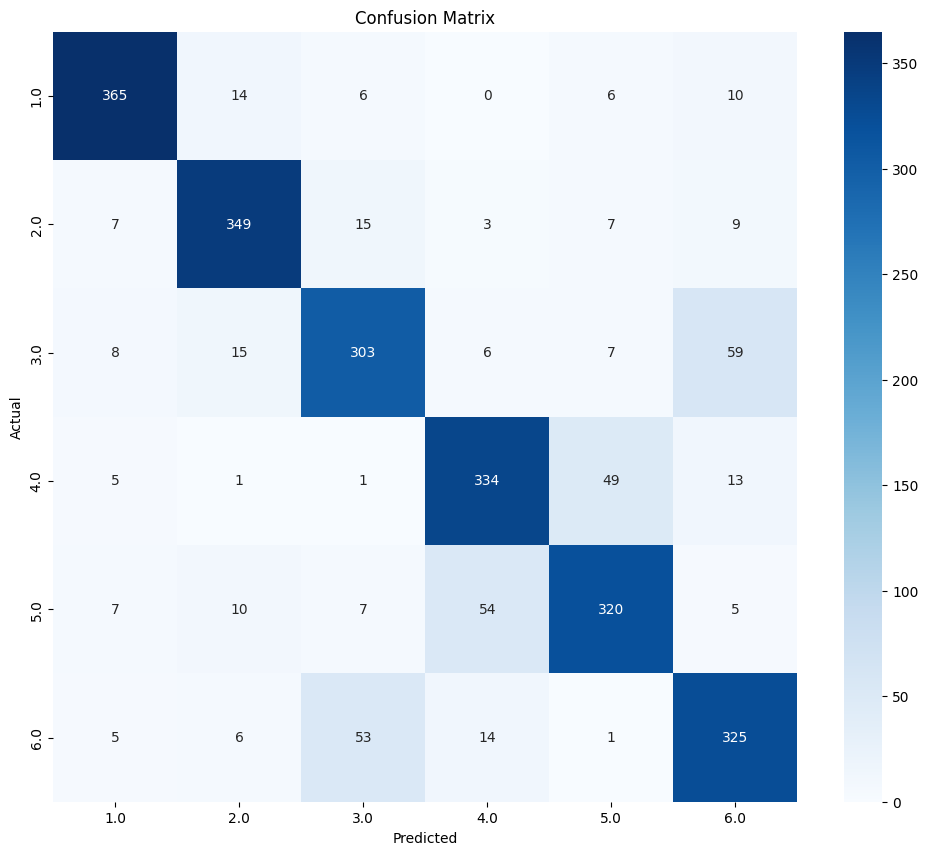

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt  # Ensure PyWavelets is installed: pip install PyWavelets
from scipy.signal import butter, filtfilt, welch
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import os

# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# ===============================================
# 1. Signal Preprocessing
# ===============================================

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    """
    Apply a Butterworth bandpass filter to the data.

    Args:
        data (np.ndarray): Input signal.
        lowcut (float): Low cutoff frequency.
        highcut (float): High cutoff frequency.
        fs (float): Sampling frequency.
        order (int): Order of the filter.

    Returns:
        np.ndarray: Filtered signal.
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def preprocess_emg(data, fs=1000, lowcut=20, highcut=450):
    """
    Preprocess EMG signals by applying bandpass filter and normalization.

    Args:
        data (pd.DataFrame): Raw EMG data.
        fs (float): Sampling frequency.
        lowcut (float): Low cutoff frequency.
        highcut (float): High cutoff frequency.

    Returns:
        pd.DataFrame: Preprocessed EMG data.
    """
    for channel in range(1, 9):
        data[f'channel{channel}'] = bandpass_filter(data[f'channel{channel}'], lowcut, highcut, fs)
        # Normalize the signal
        mean = np.mean(data[f'channel{channel}'])
        std = np.std(data[f'channel{channel}'])
        if std == 0:
            std = 1  # Prevent division by zero
        data[f'channel{channel}'] = (data[f'channel{channel}'] - mean) / std
    return data

# ===============================================
# 2. Feature Engineering
# ===============================================

def compute_wavelet_energy(signal, wavelet='db4', level=4):
    """
    Compute wavelet energy using PyWavelets.

    Args:
        signal (np.ndarray): Input signal.
        wavelet (str): Wavelet type.
        level (int): Wavelet decomposition level.

    Returns:
        float: Wavelet energy.
    """
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    energy = sum([np.sum(c ** 2) for c in coeffs])
    return energy

def compute_features(signal, fs=1000):
    """
    Compute statistical and frequency-domain features from a signal.

    Args:
        signal (np.ndarray): Input signal.
        fs (float): Sampling frequency.

    Returns:
        dict: Extracted features.
    """
    signal = np.asarray(signal)
    Pxx = welch(signal, fs=fs, nperseg=len(signal))[1]  # Set nperseg to signal length
    features = {
        'rms': np.sqrt(np.mean(signal ** 2)),
        'zcr': np.sum(np.diff(np.sign(signal)) != 0),
        'wavelet_energy': compute_wavelet_energy(signal, wavelet='db4', level=4),
        'psd_mean': np.mean(Pxx),
        'psd_std': np.std(Pxx)
    }
    return features

def compute_additional_features(signal, fs=1000):
    """
    Compute additional time and frequency domain features.

    Args:
        signal (np.ndarray): Input signal.
        fs (float): Sampling frequency.

    Returns:
        dict: Additional features.
    """
    features = {}
    # Time-Domain Features
    features['mav'] = np.mean(np.abs(signal))
    features['var'] = np.var(signal)
    features['ssc'] = np.sum(np.diff(np.sign(np.diff(signal))) != 0)
    
    # Frequency-Domain Features
    f, Pxx = welch(signal, fs=fs, nperseg=len(signal))  # Set nperseg to signal length
    features['median_freq'] = np.median(f)
    features['peak_freq'] = f[np.argmax(Pxx)]
    
    return features

def extract_additional_features(data, window_size, overlap, fs=1000):
    """
    Extract additional features from EMG data using sliding window approach.

    Args:
        data (pd.DataFrame): Preprocessed EMG data.
        window_size (int): Number of samples per window.
        overlap (int): Number of overlapping samples between windows.
        fs (float): Sampling frequency.

    Returns:
        pd.DataFrame: DataFrame containing extracted features.
    """
    feature_list = []
    step_size = window_size - overlap
    num_samples = data.shape[0]
    num_windows = int(np.floor((num_samples - window_size) / step_size)) + 1

    for i in range(num_windows):
        start = int(i * step_size)
        end = int(start + window_size)
        window_data = data.iloc[start:end]

        # Assign the class label as the majority class in the window
        class_label = window_data['class'].mode()
        if class_label.empty:
            continue
        class_label = class_label[0]

        features = {}
        for channel in range(1, 9):
            signal = window_data[f'channel{channel}'].values
            time_features = compute_features(signal, fs=fs)
            additional_time_features = compute_additional_features(signal, fs=fs)
            
            # Combine all features
            for key, value in time_features.items():
                features[f'channel{channel}_{key}'] = value
            for key, value in additional_time_features.items():
                features[f'channel{channel}_{key}'] = value

        features['class'] = class_label
        feature_list.append(features)
    return pd.DataFrame(feature_list)

# ===============================================
# 3. Handling Class Imbalance with Focal Loss
# ===============================================

class FocalLoss(nn.Module):
    """
    Focal Loss for multi-class classification.
    """
    def __init__(self, alpha=None, gamma=2, reduction='mean'):
        """
        Initialize Focal Loss.

        Args:
            alpha (Tensor, optional): Class weights tensor.
            gamma (float): Focusing parameter.
            reduction (str): Reduction method ('none', 'mean', 'sum').
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        """
        Forward pass for Focal Loss.

        Args:
            inputs (Tensor): Predictions (logits) with shape (batch_size, num_classes).
            targets (Tensor): Ground truth labels with shape (batch_size).

        Returns:
            Tensor: Loss value.
        """
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', weight=self.alpha)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# ===============================================
# 4. Deep Learning with Enhanced Architecture
# ===============================================

class EMGDataset(Dataset):
    """
    Custom Dataset for EMG data.
    """
    def __init__(self, features, labels):
        """
        Initialize the dataset.

        Args:
            features (np.ndarray): Feature matrix.
            labels (np.ndarray): Corresponding labels.
        """
        self.features = torch.tensor(features, dtype=torch.float32)  # shape: (num_samples, num_channels, num_features)
        self.labels = torch.tensor(labels, dtype=torch.long)         # shape: (num_samples)

    def __len__(self):
        """
        Return the number of samples.
        """
        return len(self.labels)

    def __getitem__(self, idx):
        """
        Retrieve a sample by index.

        Args:
            idx (int): Index of the sample.

        Returns:
            Tuple[Tensor, Tensor]: (feature, label)
        """
        return self.features[idx], self.labels[idx]

class EnhancedEMGModel(nn.Module):
    """
    Enhanced Multi-Head Attention Model with Convolutional Layers and Batch Normalization.
    """
    def __init__(self, num_channels, num_features_per_channel, num_classes, num_heads, hidden_dim):
        """
        Initialize the model.

        Args:
            num_channels (int): Number of input channels.
            num_features_per_channel (int): Number of features per channel.
            num_classes (int): Number of output classes.
            num_heads (int): Number of attention heads.
            hidden_dim (int): Dimension of hidden layers.
        """
        super(EnhancedEMGModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=num_channels, out_channels=16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(16)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(32)

        self.fc = nn.Linear(32, hidden_dim)
        self.attention = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.fc_out = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            x (Tensor): Input tensor of shape (batch_size, num_channels, num_features_per_channel).

        Returns:
            Tensor: Output logits of shape (batch_size, num_classes).
        """
        # Apply Convolutional Layers
        x = self.conv1(x)            # (batch_size, 16, num_features)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.conv2(x)            # (batch_size, 32, num_features)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Permute to match MultiheadAttention expected input
        x = x.permute(0, 2, 1)        # (batch_size, num_features, 32)

        x = self.fc(x)                # (batch_size, num_features, hidden_dim)
        x = self.relu(x)
        x = self.dropout(x)

        # Apply Multi-Head Attention
        x, _ = self.attention(x, x, x)  # (batch_size, num_features, hidden_dim)
        x = self.dropout(x)

        # Pool over features (e.g., average pooling)
        x = x.mean(dim=1)               # (batch_size, hidden_dim)

        # Final Output Layer
        x = self.fc_out(x)              # (batch_size, num_classes)
        return x

# ===============================================
# 5. Training and Evaluation Utilities
# ===============================================

def train_model(model, device, train_loader, criterion, optimizer, epoch):
    """
    Train the model for one epoch.

    Args:
        model (nn.Module): The neural network model.
        device (torch.device): Device to run the training on.
        train_loader (DataLoader): DataLoader for training data.
        criterion (nn.Module): Loss function.
        optimizer (torch.optim.Optimizer): Optimizer.
        epoch (int): Current epoch number.

    Returns:
        float: Average training loss.
    """
    model.train()
    train_loss = 0.0
    for batch_idx, (features, labels) in enumerate(train_loader):
        features, labels = features.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
        optimizer.step()

        train_loss += loss.item()

    avg_loss = train_loss / len(train_loader)
    print(f"Epoch {epoch}, Training Loss: {avg_loss:.4f}")
    return avg_loss

def evaluate_model(model, device, test_loader, label_encoder):
    """
    Evaluate the model on the test set.

    Args:
        model (nn.Module): The neural network model.
        device (torch.device): Device to run the evaluation on.
        test_loader (DataLoader): DataLoader for test data.
        label_encoder (LabelEncoder): Encoder to decode class labels.

    Returns:
        float: Weighted F1-score.
    """
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute weighted F1-score
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"Weighted F1-Score: {f1:.4f}")
    return f1, all_labels, all_preds

def plot_confusion_matrix(all_labels, all_preds, label_encoder):
    """
    Plot the confusion matrix.

    Args:
        all_labels (list): True labels.
        all_preds (list): Predicted labels.
        label_encoder (LabelEncoder): Encoder to decode class labels.
    """
    conf_matrix = confusion_matrix(all_labels, all_preds)
    target_names = [str(cls) for cls in label_encoder.classes_]

    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=target_names,
                yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# ===============================================
# 6. Main Execution
# ===============================================

def main():
    set_seed(42)

    # ===============================================
    # Load and Preprocess Dataset
    # ===============================================
    file_path = "/kaggle/working/preprocessed_emg_data.csv"  # Replace with your dataset path
    raw_data = pd.read_csv(file_path)
    print(f"Raw Data Shape: {raw_data.shape}")

    preprocessed_data = preprocess_emg(raw_data)
    print(f"Preprocessed Data Shape: {preprocessed_data.shape}")

    # ===============================================
    # Remove Class 0 and Class 7
    # ===============================================
    filtered_data = preprocessed_data[(preprocessed_data['class'] != 0) & (preprocessed_data['class'] != 7)]
    print(f"Filtered Data Shape (Removed Class 0 & 7): {filtered_data.shape}")
    print("Class Distribution After Filtering:")
    print(filtered_data['class'].value_counts())

    # ===============================================
    # Feature Extraction
    # ===============================================
    window_size = 250  # Number of samples per window (0.25 sec if fs=1000 Hz)
    overlap = 125       # Overlap of 50% (step_size=125)

    features_df = extract_additional_features(filtered_data, window_size, overlap)
    features_df.to_csv('emg_features_enhanced.csv', index=False)
    print(f"Extracted Features Shape: {features_df.shape}")
    print("Class Distribution After Feature Extraction:")
    print(features_df['class'].value_counts())

    # ===============================================
    # Prepare Dataset for PyTorch
    # ===============================================
    X = features_df.drop(columns=['class'])
    y = features_df['class']

    # Encode labels to integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    num_classes = len(np.unique(y_encoded))
    print(f"Number of Classes: {num_classes}")
    print(f"Classes: {label_encoder.classes_}")

    # ===============================================
    # Handle Class Imbalance
    # ===============================================
    # Check class distribution
    class_counts = pd.Series(y_encoded).value_counts()
    print("Class Distribution Before Handling Imbalance:")
    print(class_counts)

    # Since after feature extraction, classes are roughly balanced, no need for SMOTE
    # Proceeding without SMOTE
    X_resampled, y_resampled = X, y_encoded

    # ===============================================
    # Train-Test Split
    # ===============================================
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )
    print("Training Set Class Distribution:")
    print(pd.Series(y_train).value_counts())
    print("Testing Set Class Distribution:")
    print(pd.Series(y_test).value_counts())

    # ===============================================
    # Compute Class Weights
    # ===============================================
    class_counts = np.bincount(y_train)
    class_weights = 1. / class_counts
    class_weights = class_weights / class_weights.sum() * len(class_counts)
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)
    print(f"Class Weights: {class_weights}")

    # ===============================================
    # Scale Features
    # ===============================================
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ===============================================
    # Reshape Features for the Model
    # ===============================================
    num_features_per_channel = 10  # ['rms', 'zcr', 'wavelet_energy', 'psd_mean', 'psd_std',
                                   # 'mav', 'var', 'ssc', 'median_freq', 'peak_freq']
    num_channels = 8
    X_train_reshaped = X_train_scaled.reshape(-1, num_channels, num_features_per_channel)
    X_test_reshaped = X_test_scaled.reshape(-1, num_channels, num_features_per_channel)
    print(f"Training Features Shape: {X_train_reshaped.shape}")
    print(f"Testing Features Shape: {X_test_reshaped.shape}")

    # ===============================================
    # Create Datasets and DataLoaders
    # ===============================================
    train_dataset = EMGDataset(X_train_reshaped, y_train)
    test_dataset = EMGDataset(X_test_reshaped, y_test)

    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=4, pin_memory=True)

    # ===============================================
    # Initialize the Enhanced Model
    # ===============================================
    model = EnhancedEMGModel(
        num_channels=num_channels,
        num_features_per_channel=num_features_per_channel,
        num_classes=num_classes,
        num_heads=4,
        hidden_dim=128
    )

    # Print model architecture to verify
    print(model)

    # Move model to device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    print(f"Using device: {device}")

    # ===============================================
    # Define Loss Function, Optimizer, and Scheduler
    # ===============================================
    # Use class weights to handle imbalance
    criterion = FocalLoss(alpha=class_weights_tensor.to(device), gamma=2, reduction='mean')
    # Alternatively, use CrossEntropyLoss with class weights
    # criterion = nn.CrossEntropyLoss(weight=class_weights_tensor.to(device))

    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3, verbose=True)

    # ===============================================
    # Training Loop with Enhanced Strategies
    # ===============================================
    epochs = 50  # Increased epochs for better learning
    best_f1 = 0.0
    patience = 7  # Early stopping patience
    trigger_times = 0

    for epoch in range(1, epochs + 1):
        # Training Phase
        train_loss = train_model(model, device, train_loader, criterion, optimizer, epoch)

        # Evaluation Phase
        f1, _, _ = evaluate_model(model, device, test_loader, label_encoder)

        # Step the scheduler
        scheduler.step(f1)

        # Check for improvement
        if f1 > best_f1:
            best_f1 = f1
            torch.save(model.state_dict(), 'best_emg_model.pth')
            print("Best model saved.")
            trigger_times = 0
        else:
            trigger_times += 1
            print(f"No improvement for {trigger_times} epochs.")
            if trigger_times >= patience:
                print("Early stopping triggered.")
                break

    # ===============================================
    # Final Evaluation
    # ===============================================
    # Load the best model
    model.load_state_dict(torch.load('best_emg_model.pth'))
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert class labels to strings for target_names
    target_names = [str(cls) for cls in label_encoder.classes_]

    # Classification report
    print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=target_names, zero_division=0))

    # Confusion Matrix Visualization
    plot_confusion_matrix(all_labels, all_preds, label_encoder)

if __name__ == "__main__":
    main()
